In [1]:
import h5py
import numpy as np
import scanpy as sc
import torch
import random
from scace import run_scace

/opt/miniconda3/envs/scrnaseq/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
import sklearn
import phenograph

In [2]:
import scVGAE.scVGAE as scVGAE

## Set seed

In [3]:
seed = 666
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

## Read data

In [46]:
# This data could be downloaded from https://drive.google.com/drive/folders/1c33An3HNdJQhazoy_ky9E-lCc3a4y7fl
data_mat = h5py.File('data/Human_p.h5')
x, y = np.array(data_mat['X']), np.array(data_mat['Y'])
data_mat.close()
adata = sc.AnnData(x)
adata.obs['celltype'] = y

In [8]:
df = adata.to_df()
df['celltype'] = y
df = df.set_index('celltype')

In [9]:
import scprep
tmp = np.sign(df)
cols = (np.sum(tmp) > int((df.shape[0])*0.05))
rows = (np.sum(tmp, axis=1) > int((df.shape[1])*0.05))
df = scprep.normalize.library_size_normalize(df)    
df = scprep.transform.sqrt(df)
df

,0,1,2,3,4,5,6,7,8,9,...,20115,20116,20117,20118,20119,20120,20121,20122,20123,20124
celltype,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.611178,1.497074,0.000000,0.000000,0.000000
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.973216,0.000000,1.376335,0.000000,0.000000,0.973216
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.071538,1.515383,0.000000,0.000000,0.874907
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.931655,0.931655,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.931655,0.000000,0.000000,0.658779
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,1.179249,0.000000,0.680839,0.962852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.754497,0.000000,0.000000
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Data preprocesssing using scVGAE

In [17]:
import os
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'
print(os.environ['PYTORCH_ENABLE_MPS_FALLBACK'])

1


In [18]:
imputed_matrix = scVGAE.run_model(df, verbose=True)

 11%|█         | 11/100 [06:33<53:03, 35.76s/it]


KeyboardInterrupt: 

In [ ]:
np.save("human_p_imputed", imputed_matrix)

In [10]:
imputed_matrix = np.load("human_p_imputed.npy")

In [11]:
adata.obs

,celltype
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3600,3.0
3601,4.0
3602,3.0
3603,4.0


In [12]:
imputed_matrix.shape

(3605, 20125)

In [13]:
adata.X = imputed_matrix

In [14]:
adata.obs

,celltype
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3600,3.0
3601,4.0
3602,3.0
3603,4.0


In [15]:
print(np.sum(adata.X == 0))

4


## Clustering Using PhenoGraph

In [43]:
pca = sklearn.decomposition.PCA(n_components=750)
X_pca = pca.fit_transform(adata.X)
communities, graph, Q = phenograph.cluster(X_pca)

ari = sklearn.metrics.adjusted_rand_score(adata.obs['celltype'], communities)
nmi = sklearn.metrics.normalized_mutual_info_score(adata.obs['celltype'], communities)
print("ARI : " , ari)
print("NMI : " , nmi)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.32420873641967773 seconds
Jaccard graph constructed in 1.5360345840454102 seconds
Wrote graph to binary file in 0.029510021209716797 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.756362
After 5 runs, maximum modularity is Q = 0.757417
Louvain completed 25 runs in 0.8934860229492188 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 3.457974910736084 seconds
ARI :  0.8948612931907912
NMI :  0.8305857254921833


In [44]:
best_init = communities

### Random subsampling

In [25]:
print(adata.X.shape[0])

3605


Randomly sampling 3000 cells from the dataset to test statistical signifigance

In [31]:
pca = sklearn.decomposition.PCA(n_components=750)
random_indices = np.random.choice(adata.X.shape[0], 3000, replace=False)
X_pca = pca.fit_transform(adata.X[random_indices])
communities, graph, Q = phenograph.cluster(X_pca)

ari = sklearn.metrics.adjusted_rand_score(adata.obs['celltype'][random_indices], communities)
nmi = sklearn.metrics.normalized_mutual_info_score(adata.obs['celltype'][random_indices], communities)
print("ARI : " , ari)
print("NMI : " , nmi)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.23379731178283691 seconds
Jaccard graph constructed in 1.5711688995361328 seconds
Wrote graph to binary file in 0.023025989532470703 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.742264
Louvain completed 21 runs in 0.8267149925231934 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 3.3320729732513428 seconds
ARI :  0.8812251385485804
NMI :  0.8173210883509345


In [19]:
## find unique values and their counts in communities

unique, counts = np.unique(communities, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 1127]
 [   1  930]
 [   2  820]
 [   3  425]
 [   4  153]
 [   5  116]
 [   6   34]]


         Falling back to preprocessing with `sc.pp.pca` and default params.


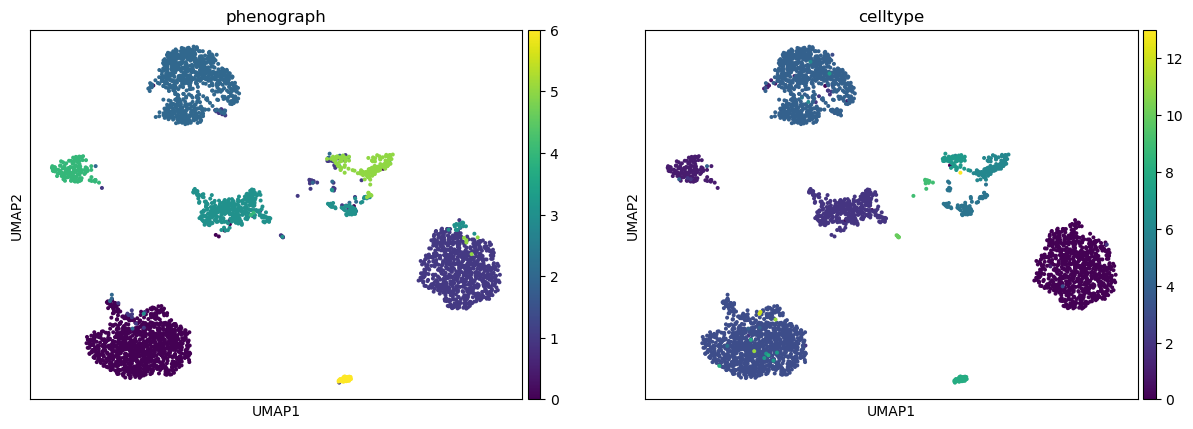

In [22]:
adata_cl = adata.copy()
sc.pp.neighbors(adata_cl)
sc.tl.umap(adata_cl)
adata_cl.obs['phenograph'] = communities.astype(int)
adata_cl.obs['celltype'] = adata.obs['celltype'].astype(int) 
sc.pl.umap(adata_cl, color=['phenograph', 'celltype'])

In [17]:
print(ari)

0.6584608197770192


## Clustering using KMeans

### Without PCA

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=adata.obs['celltype'].nunique()).fit(adata.X)
kmeans.labels_
ari = sklearn.metrics.adjusted_rand_score(adata.obs['celltype'], kmeans.labels_)
nmi = sklearn.metrics.normalized_mutual_info_score(adata.obs['celltype'], kmeans.labels_)
print("ARI : " , ari)
print("NMI : ", nmi)

/opt/miniconda3/envs/scrnaseq/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

ARI :  0.6774956276075321
NMI :  0.7849651845430251


### Clustering With PCA

In [42]:
from sklearn.cluster import KMeans
pca = sklearn.decomposition.PCA(n_components=1000)
random_indices = np.random.choice(adata.X.shape[0], 3000, replace=False)
X_pca = pca.fit_transform(adata.X[random_indices])
print(X_pca.shape)
kmeans_pca = KMeans(n_clusters=adata.obs['celltype'][random_indices].nunique(), random_state=0).fit(X_pca)
ari = sklearn.metrics.adjusted_rand_score(adata.obs['celltype'][random_indices], kmeans_pca.labels_)
nmi = sklearn.metrics.normalized_mutual_info_score(adata.obs['celltype'][random_indices], kmeans_pca.labels_)
print("ARI : " , ari)
print("NMI : ", nmi)

(3000, 1000)


/opt/miniconda3/envs/scrnaseq/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ARI :  0.6766638105682681
NMI :  0.8051370233030443


         Falling back to preprocessing with `sc.pp.pca` and default params.


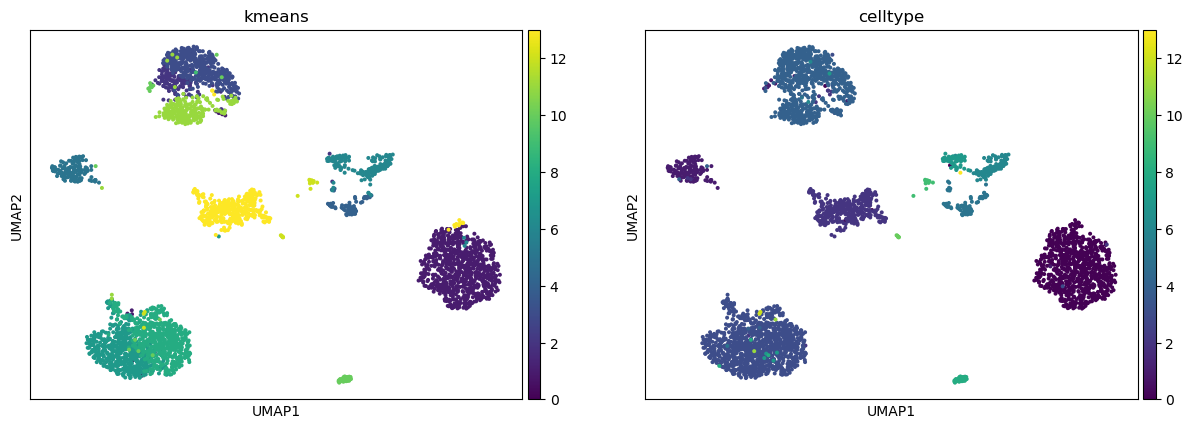

In [35]:
adata_cl = adata.copy()
sc.pp.neighbors(adata_cl)
sc.tl.umap(adata_cl)
adata_cl.obs['kmeans'] = kmeans_pca.labels_.astype(int)
adata_cl.obs['celltype'] = adata.obs['celltype'].astype(int) 
sc.pl.umap(adata_cl, color=['kmeans', 'celltype'])

## scAce Preprocessing

In [47]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
adata.raw = adata.copy()

sc.pp.normalize_per_cell(adata)
adata.obs['scale_factor'] = adata.obs.n_counts / adata.obs.n_counts.mean()

sc.pp.log1p(adata)
sc.pp.scale(adata)

In [48]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
adata.raw = adata.copy()
print(adata)

AnnData object with n_obs × n_vars = 3605 × 15228
    obs: 'celltype', 'n_genes', 'n_counts', 'scale_factor'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'


In [49]:
np.sum(np.isnan(adata.X))

0

## Run scAce

In default mode, function `run_scace` would return an AnnData object with embedding and clustering result stored in `adata.obsm['scace_emb']` and `adata.obs['scace_cluster']`

In [14]:
# adata = run_scace(adata)

If return_all is True, function `run_scace` would print and return all temporate results:

- K: Final number of clusters.
- pred_all: All temporary clustering results.
- emb_all: All temporary embedding.


In [15]:
# adata, K, pred_all, emb_all, run_time = run_scace(adata, return_all=True)

In [50]:
adata, nmi, ari, K, pred_all, emb_all, run_time = run_scace(adata, init_cluster= best_init, cl_type='celltype', return_all=True)

Start pre-training! Total epochs is 200.


Pre-training::   0%|          | 1/200 [00:03<11:17,  3.40s/epoch]

Pre-training epoch [1/200]. Average ZINB loss:0.5349, kld loss:7.4855, total loss:0.5424


Pre-training::   1%|          | 2/200 [00:06<10:58,  3.33s/epoch]

Pre-training epoch [2/200]. Average ZINB loss:0.4817, kld loss:5.7898, total loss:0.4875


Pre-training::   2%|▏         | 3/200 [00:09<10:51,  3.31s/epoch]

Pre-training epoch [3/200]. Average ZINB loss:0.4517, kld loss:6.2785, total loss:0.4580


Pre-training::   2%|▏         | 4/200 [00:13<10:52,  3.33s/epoch]

Pre-training epoch [4/200]. Average ZINB loss:0.4333, kld loss:7.2010, total loss:0.4405


Pre-training::   2%|▎         | 5/200 [00:16<10:49,  3.33s/epoch]

Pre-training epoch [5/200]. Average ZINB loss:0.4176, kld loss:8.2833, total loss:0.4259


Pre-training::   3%|▎         | 6/200 [00:19<10:46,  3.33s/epoch]

Pre-training epoch [6/200]. Average ZINB loss:0.4090, kld loss:9.3763, total loss:0.4184


Pre-training::   4%|▎         | 7/200 [00:23<10:44,  3.34s/epoch]

Pre-training epoch [7/200]. Average ZINB loss:0.3980, kld loss:10.0132, total loss:0.4080


Pre-training::   4%|▍         | 8/200 [00:26<10:41,  3.34s/epoch]

Pre-training epoch [8/200]. Average ZINB loss:0.3943, kld loss:10.1450, total loss:0.4044


Pre-training::   4%|▍         | 9/200 [00:30<10:45,  3.38s/epoch]

Pre-training epoch [9/200]. Average ZINB loss:0.3886, kld loss:10.5850, total loss:0.3992


Pre-training::   5%|▌         | 10/200 [00:33<10:41,  3.38s/epoch]

Pre-training epoch [10/200]. Average ZINB loss:0.3843, kld loss:10.4360, total loss:0.3948


Pre-training::   6%|▌         | 11/200 [00:36<10:36,  3.37s/epoch]

Pre-training epoch [11/200]. Average ZINB loss:0.3814, kld loss:10.5059, total loss:0.3919


Pre-training::   6%|▌         | 12/200 [00:40<10:33,  3.37s/epoch]

Pre-training epoch [12/200]. Average ZINB loss:0.3786, kld loss:10.6006, total loss:0.3892


Pre-training::   6%|▋         | 13/200 [00:43<10:29,  3.37s/epoch]

Pre-training epoch [13/200]. Average ZINB loss:0.3770, kld loss:10.3317, total loss:0.3874


Pre-training::   7%|▋         | 14/200 [00:47<10:28,  3.38s/epoch]

Pre-training epoch [14/200]. Average ZINB loss:0.3766, kld loss:10.2793, total loss:0.3868


Pre-training::   8%|▊         | 15/200 [00:50<10:24,  3.38s/epoch]

Pre-training epoch [15/200]. Average ZINB loss:0.3741, kld loss:10.0042, total loss:0.3841


Pre-training::   8%|▊         | 16/200 [00:53<10:22,  3.38s/epoch]

Pre-training epoch [16/200]. Average ZINB loss:0.3702, kld loss:10.2475, total loss:0.3805


Pre-training::   8%|▊         | 17/200 [00:57<10:20,  3.39s/epoch]

Pre-training epoch [17/200]. Average ZINB loss:0.3727, kld loss:10.1124, total loss:0.3828


Pre-training::   9%|▉         | 18/200 [01:00<10:16,  3.39s/epoch]

Pre-training epoch [18/200]. Average ZINB loss:0.3700, kld loss:9.9200, total loss:0.3799


Pre-training::  10%|▉         | 19/200 [01:03<10:13,  3.39s/epoch]

Pre-training epoch [19/200]. Average ZINB loss:0.3689, kld loss:10.1965, total loss:0.3791


Pre-training::  10%|█         | 20/200 [01:07<10:09,  3.39s/epoch]

Pre-training epoch [20/200]. Average ZINB loss:0.3686, kld loss:10.2395, total loss:0.3788


Pre-training::  10%|█         | 21/200 [01:10<10:04,  3.38s/epoch]

Pre-training epoch [21/200]. Average ZINB loss:0.3687, kld loss:10.1304, total loss:0.3788


Pre-training::  11%|█         | 22/200 [01:14<10:02,  3.38s/epoch]

Pre-training epoch [22/200]. Average ZINB loss:0.3662, kld loss:10.2345, total loss:0.3765


Pre-training::  12%|█▏        | 23/200 [01:17<10:04,  3.42s/epoch]

Pre-training epoch [23/200]. Average ZINB loss:0.3671, kld loss:10.3353, total loss:0.3774


Pre-training::  12%|█▏        | 24/200 [01:21<10:01,  3.42s/epoch]

Pre-training epoch [24/200]. Average ZINB loss:0.3637, kld loss:10.3724, total loss:0.3741


Pre-training::  12%|█▎        | 25/200 [01:24<09:57,  3.41s/epoch]

Pre-training epoch [25/200]. Average ZINB loss:0.3652, kld loss:10.3096, total loss:0.3755


Pre-training::  13%|█▎        | 26/200 [01:27<09:51,  3.40s/epoch]

Pre-training epoch [26/200]. Average ZINB loss:0.3628, kld loss:10.2211, total loss:0.3730


Pre-training::  14%|█▎        | 27/200 [01:31<09:48,  3.40s/epoch]

Pre-training epoch [27/200]. Average ZINB loss:0.3632, kld loss:10.1158, total loss:0.3733


Pre-training::  14%|█▍        | 28/200 [01:34<09:44,  3.40s/epoch]

Pre-training epoch [28/200]. Average ZINB loss:0.3636, kld loss:10.3205, total loss:0.3739


Pre-training::  14%|█▍        | 29/200 [01:37<09:41,  3.40s/epoch]

Pre-training epoch [29/200]. Average ZINB loss:0.3611, kld loss:10.2180, total loss:0.3713


Pre-training::  15%|█▌        | 30/200 [01:41<09:36,  3.39s/epoch]

Pre-training epoch [30/200]. Average ZINB loss:0.3636, kld loss:10.1850, total loss:0.3738


Pre-training::  16%|█▌        | 31/200 [01:44<09:33,  3.39s/epoch]

Pre-training epoch [31/200]. Average ZINB loss:0.3617, kld loss:10.2492, total loss:0.3719


Pre-training::  16%|█▌        | 32/200 [01:48<09:30,  3.40s/epoch]

Pre-training epoch [32/200]. Average ZINB loss:0.3609, kld loss:10.2044, total loss:0.3711


Pre-training::  16%|█▋        | 33/200 [01:51<09:26,  3.39s/epoch]

Pre-training epoch [33/200]. Average ZINB loss:0.3597, kld loss:10.2469, total loss:0.3700


Pre-training::  17%|█▋        | 34/200 [01:54<09:24,  3.40s/epoch]

Pre-training epoch [34/200]. Average ZINB loss:0.3592, kld loss:10.3714, total loss:0.3696


Pre-training::  18%|█▊        | 35/200 [01:58<09:20,  3.40s/epoch]

Pre-training epoch [35/200]. Average ZINB loss:0.3594, kld loss:10.1016, total loss:0.3695


Pre-training::  18%|█▊        | 36/200 [02:01<09:17,  3.40s/epoch]

Pre-training epoch [36/200]. Average ZINB loss:0.3591, kld loss:10.2698, total loss:0.3693


Pre-training::  18%|█▊        | 37/200 [02:05<09:14,  3.40s/epoch]

Pre-training epoch [37/200]. Average ZINB loss:0.3583, kld loss:10.2647, total loss:0.3685


Pre-training::  19%|█▉        | 38/200 [02:08<09:15,  3.43s/epoch]

Pre-training epoch [38/200]. Average ZINB loss:0.3586, kld loss:10.4111, total loss:0.3690


Pre-training::  20%|█▉        | 39/200 [02:12<09:12,  3.43s/epoch]

Pre-training epoch [39/200]. Average ZINB loss:0.3581, kld loss:10.4441, total loss:0.3685


Pre-training::  20%|██        | 40/200 [02:15<09:12,  3.46s/epoch]

Pre-training epoch [40/200]. Average ZINB loss:0.3580, kld loss:10.5269, total loss:0.3685


Pre-training::  20%|██        | 41/200 [02:19<09:10,  3.46s/epoch]

Pre-training epoch [41/200]. Average ZINB loss:0.3563, kld loss:10.3855, total loss:0.3667


Pre-training::  21%|██        | 42/200 [02:22<09:05,  3.45s/epoch]

Pre-training epoch [42/200]. Average ZINB loss:0.3556, kld loss:10.5163, total loss:0.3661


Pre-training::  22%|██▏       | 43/200 [02:25<09:00,  3.44s/epoch]

Pre-training epoch [43/200]. Average ZINB loss:0.3556, kld loss:10.5396, total loss:0.3662


Pre-training::  22%|██▏       | 44/200 [02:29<08:54,  3.43s/epoch]

Pre-training epoch [44/200]. Average ZINB loss:0.3570, kld loss:10.4441, total loss:0.3674


Pre-training::  22%|██▎       | 45/200 [02:32<08:50,  3.42s/epoch]

Pre-training epoch [45/200]. Average ZINB loss:0.3554, kld loss:10.5212, total loss:0.3659


Pre-training::  23%|██▎       | 46/200 [02:36<08:50,  3.45s/epoch]

Pre-training epoch [46/200]. Average ZINB loss:0.3529, kld loss:10.6670, total loss:0.3636


Pre-training::  24%|██▎       | 47/200 [02:39<08:55,  3.50s/epoch]

Pre-training epoch [47/200]. Average ZINB loss:0.3548, kld loss:10.7562, total loss:0.3656


Pre-training::  24%|██▍       | 48/200 [02:43<08:58,  3.54s/epoch]

Pre-training epoch [48/200]. Average ZINB loss:0.3560, kld loss:10.5538, total loss:0.3666


Pre-training::  24%|██▍       | 49/200 [02:46<08:53,  3.53s/epoch]

Pre-training epoch [49/200]. Average ZINB loss:0.3544, kld loss:10.6393, total loss:0.3651


Pre-training::  25%|██▌       | 50/200 [02:50<08:40,  3.47s/epoch]

Pre-training epoch [50/200]. Average ZINB loss:0.3541, kld loss:10.6830, total loss:0.3647


Pre-training::  26%|██▌       | 51/200 [02:53<08:31,  3.43s/epoch]

Pre-training epoch [51/200]. Average ZINB loss:0.3513, kld loss:10.6760, total loss:0.3619


Pre-training::  26%|██▌       | 52/200 [02:57<08:23,  3.40s/epoch]

Pre-training epoch [52/200]. Average ZINB loss:0.3527, kld loss:10.7943, total loss:0.3635


Pre-training::  26%|██▋       | 53/200 [03:00<08:16,  3.38s/epoch]

Pre-training epoch [53/200]. Average ZINB loss:0.3530, kld loss:10.9554, total loss:0.3639


Pre-training::  27%|██▋       | 54/200 [03:03<08:16,  3.40s/epoch]

Pre-training epoch [54/200]. Average ZINB loss:0.3507, kld loss:10.9452, total loss:0.3617


Pre-training::  28%|██▊       | 55/200 [03:07<08:34,  3.55s/epoch]

Pre-training epoch [55/200]. Average ZINB loss:0.3497, kld loss:10.8236, total loss:0.3605


Pre-training::  28%|██▊       | 56/200 [03:11<08:31,  3.55s/epoch]

Pre-training epoch [56/200]. Average ZINB loss:0.3506, kld loss:10.8164, total loss:0.3614


Pre-training::  28%|██▊       | 57/200 [03:14<08:21,  3.51s/epoch]

Pre-training epoch [57/200]. Average ZINB loss:0.3493, kld loss:10.8670, total loss:0.3602


Pre-training::  29%|██▉       | 58/200 [03:18<08:15,  3.49s/epoch]

Pre-training epoch [58/200]. Average ZINB loss:0.3503, kld loss:10.8169, total loss:0.3612


Pre-training::  30%|██▉       | 59/200 [03:21<08:10,  3.48s/epoch]

Pre-training epoch [59/200]. Average ZINB loss:0.3503, kld loss:11.0355, total loss:0.3614


Pre-training::  30%|███       | 60/200 [03:24<08:05,  3.47s/epoch]

Pre-training epoch [60/200]. Average ZINB loss:0.3503, kld loss:10.8442, total loss:0.3612


Pre-training::  30%|███       | 61/200 [03:28<07:59,  3.45s/epoch]

Pre-training epoch [61/200]. Average ZINB loss:0.3477, kld loss:11.2665, total loss:0.3589


Pre-training::  31%|███       | 62/200 [03:31<07:51,  3.41s/epoch]

Pre-training epoch [62/200]. Average ZINB loss:0.3486, kld loss:11.0587, total loss:0.3596


Pre-training::  32%|███▏      | 63/200 [03:35<07:45,  3.40s/epoch]

Pre-training epoch [63/200]. Average ZINB loss:0.3500, kld loss:11.2410, total loss:0.3613


Pre-training::  32%|███▏      | 64/200 [03:38<07:38,  3.37s/epoch]

Pre-training epoch [64/200]. Average ZINB loss:0.3496, kld loss:11.0747, total loss:0.3607


Pre-training::  32%|███▎      | 65/200 [03:41<07:33,  3.36s/epoch]

Pre-training epoch [65/200]. Average ZINB loss:0.3499, kld loss:11.1233, total loss:0.3611


Pre-training::  33%|███▎      | 66/200 [03:45<07:28,  3.35s/epoch]

Pre-training epoch [66/200]. Average ZINB loss:0.3472, kld loss:11.0754, total loss:0.3582


Pre-training::  34%|███▎      | 67/200 [03:48<07:24,  3.34s/epoch]

Pre-training epoch [67/200]. Average ZINB loss:0.3507, kld loss:11.1950, total loss:0.3619


Pre-training::  34%|███▍      | 68/200 [03:51<07:20,  3.34s/epoch]

Pre-training epoch [68/200]. Average ZINB loss:0.3476, kld loss:11.4687, total loss:0.3590


Pre-training::  34%|███▍      | 69/200 [03:55<07:17,  3.34s/epoch]

Pre-training epoch [69/200]. Average ZINB loss:0.3477, kld loss:11.3025, total loss:0.3590


Pre-training::  35%|███▌      | 70/200 [03:58<07:15,  3.35s/epoch]

Pre-training epoch [70/200]. Average ZINB loss:0.3478, kld loss:11.2983, total loss:0.3591


Pre-training::  36%|███▌      | 71/200 [04:01<07:15,  3.37s/epoch]

Pre-training epoch [71/200]. Average ZINB loss:0.3461, kld loss:11.1867, total loss:0.3573


Pre-training::  36%|███▌      | 72/200 [04:05<07:13,  3.38s/epoch]

Pre-training epoch [72/200]. Average ZINB loss:0.3463, kld loss:11.3145, total loss:0.3576


Pre-training::  36%|███▋      | 73/200 [04:08<07:09,  3.38s/epoch]

Pre-training epoch [73/200]. Average ZINB loss:0.3455, kld loss:11.2754, total loss:0.3568


Pre-training::  37%|███▋      | 74/200 [04:12<07:06,  3.39s/epoch]

Pre-training epoch [74/200]. Average ZINB loss:0.3461, kld loss:11.2953, total loss:0.3574


Pre-training::  38%|███▊      | 75/200 [04:15<07:00,  3.36s/epoch]

Pre-training epoch [75/200]. Average ZINB loss:0.3465, kld loss:11.2321, total loss:0.3578


Pre-training::  38%|███▊      | 76/200 [04:18<06:57,  3.37s/epoch]

Pre-training epoch [76/200]. Average ZINB loss:0.3453, kld loss:11.4172, total loss:0.3567


Pre-training::  38%|███▊      | 77/200 [04:22<06:54,  3.37s/epoch]

Pre-training epoch [77/200]. Average ZINB loss:0.3456, kld loss:11.5133, total loss:0.3571


Pre-training::  39%|███▉      | 78/200 [04:25<06:53,  3.39s/epoch]

Pre-training epoch [78/200]. Average ZINB loss:0.3448, kld loss:11.2735, total loss:0.3561


Pre-training::  40%|███▉      | 79/200 [04:29<06:57,  3.45s/epoch]

Pre-training epoch [79/200]. Average ZINB loss:0.3457, kld loss:11.3250, total loss:0.3570


Pre-training::  40%|████      | 80/200 [04:32<06:51,  3.43s/epoch]

Pre-training epoch [80/200]. Average ZINB loss:0.3444, kld loss:11.4363, total loss:0.3558


Pre-training::  40%|████      | 81/200 [04:35<06:49,  3.44s/epoch]

Pre-training epoch [81/200]. Average ZINB loss:0.3438, kld loss:11.4802, total loss:0.3553


Pre-training::  41%|████      | 82/200 [04:39<06:48,  3.47s/epoch]

Pre-training epoch [82/200]. Average ZINB loss:0.3436, kld loss:11.2995, total loss:0.3549


Pre-training::  42%|████▏     | 83/200 [04:42<06:45,  3.46s/epoch]

Pre-training epoch [83/200]. Average ZINB loss:0.3420, kld loss:11.4787, total loss:0.3535


Pre-training::  42%|████▏     | 84/200 [04:46<06:40,  3.45s/epoch]

Pre-training epoch [84/200]. Average ZINB loss:0.3446, kld loss:11.4037, total loss:0.3560


Pre-training::  42%|████▎     | 85/200 [04:49<06:35,  3.44s/epoch]

Pre-training epoch [85/200]. Average ZINB loss:0.3436, kld loss:11.4614, total loss:0.3551


Pre-training::  43%|████▎     | 86/200 [04:53<06:29,  3.41s/epoch]

Pre-training epoch [86/200]. Average ZINB loss:0.3446, kld loss:11.5207, total loss:0.3561


Pre-training::  44%|████▎     | 87/200 [04:56<06:30,  3.46s/epoch]

Pre-training epoch [87/200]. Average ZINB loss:0.3434, kld loss:11.3877, total loss:0.3548


Pre-training::  44%|████▍     | 88/200 [05:00<06:29,  3.48s/epoch]

Pre-training epoch [88/200]. Average ZINB loss:0.3413, kld loss:11.4030, total loss:0.3527


Pre-training::  44%|████▍     | 89/200 [05:03<06:21,  3.44s/epoch]

Pre-training epoch [89/200]. Average ZINB loss:0.3429, kld loss:11.4497, total loss:0.3543


Pre-training::  45%|████▌     | 90/200 [05:06<06:15,  3.42s/epoch]

Pre-training epoch [90/200]. Average ZINB loss:0.3435, kld loss:11.4338, total loss:0.3550


Pre-training::  46%|████▌     | 91/200 [05:10<06:10,  3.40s/epoch]

Pre-training epoch [91/200]. Average ZINB loss:0.3439, kld loss:11.5255, total loss:0.3554


Pre-training::  46%|████▌     | 92/200 [05:13<06:05,  3.39s/epoch]

Pre-training epoch [92/200]. Average ZINB loss:0.3418, kld loss:11.6430, total loss:0.3535


Pre-training::  46%|████▋     | 93/200 [05:17<06:06,  3.43s/epoch]

Pre-training epoch [93/200]. Average ZINB loss:0.3421, kld loss:11.3901, total loss:0.3534


Pre-training::  47%|████▋     | 94/200 [05:20<06:04,  3.44s/epoch]

Pre-training epoch [94/200]. Average ZINB loss:0.3421, kld loss:11.4734, total loss:0.3536


Pre-training::  48%|████▊     | 95/200 [05:23<05:58,  3.41s/epoch]

Pre-training epoch [95/200]. Average ZINB loss:0.3400, kld loss:11.5697, total loss:0.3516


Pre-training::  48%|████▊     | 96/200 [05:27<05:53,  3.40s/epoch]

Pre-training epoch [96/200]. Average ZINB loss:0.3408, kld loss:11.4927, total loss:0.3523


Pre-training::  48%|████▊     | 97/200 [05:30<05:50,  3.40s/epoch]

Pre-training epoch [97/200]. Average ZINB loss:0.3417, kld loss:11.5308, total loss:0.3533


Pre-training::  49%|████▉     | 98/200 [05:34<05:47,  3.40s/epoch]

Pre-training epoch [98/200]. Average ZINB loss:0.3435, kld loss:11.5236, total loss:0.3550


Pre-training::  50%|████▉     | 99/200 [05:37<05:52,  3.49s/epoch]

Pre-training epoch [99/200]. Average ZINB loss:0.3421, kld loss:11.4816, total loss:0.3536


Pre-training::  50%|█████     | 100/200 [05:41<05:50,  3.51s/epoch]

Pre-training epoch [100/200]. Average ZINB loss:0.3418, kld loss:11.4537, total loss:0.3532


Pre-training::  50%|█████     | 101/200 [05:44<05:46,  3.50s/epoch]

Pre-training epoch [101/200]. Average ZINB loss:0.3414, kld loss:11.5053, total loss:0.3529


Pre-training::  51%|█████     | 102/200 [05:48<05:40,  3.48s/epoch]

Pre-training epoch [102/200]. Average ZINB loss:0.3384, kld loss:11.3683, total loss:0.3498


Pre-training::  52%|█████▏    | 103/200 [05:52<05:46,  3.57s/epoch]

Pre-training epoch [103/200]. Average ZINB loss:0.3413, kld loss:11.4572, total loss:0.3528


Pre-training::  52%|█████▏    | 104/200 [05:55<05:39,  3.53s/epoch]

Pre-training epoch [104/200]. Average ZINB loss:0.3398, kld loss:11.5945, total loss:0.3514


Pre-training::  52%|█████▎    | 105/200 [05:58<05:31,  3.49s/epoch]

Pre-training epoch [105/200]. Average ZINB loss:0.3405, kld loss:11.4005, total loss:0.3519


Pre-training::  53%|█████▎    | 106/200 [06:02<05:25,  3.46s/epoch]

Pre-training epoch [106/200]. Average ZINB loss:0.3397, kld loss:11.3724, total loss:0.3511


Pre-training::  54%|█████▎    | 107/200 [06:05<05:23,  3.48s/epoch]

Pre-training epoch [107/200]. Average ZINB loss:0.3393, kld loss:11.5488, total loss:0.3509


Pre-training::  54%|█████▍    | 108/200 [06:09<05:17,  3.45s/epoch]

Pre-training epoch [108/200]. Average ZINB loss:0.3386, kld loss:11.3467, total loss:0.3500


Pre-training::  55%|█████▍    | 109/200 [06:12<05:12,  3.44s/epoch]

Pre-training epoch [109/200]. Average ZINB loss:0.3404, kld loss:11.5555, total loss:0.3519


Pre-training::  55%|█████▌    | 110/200 [06:16<05:11,  3.47s/epoch]

Pre-training epoch [110/200]. Average ZINB loss:0.3395, kld loss:11.4821, total loss:0.3510


Pre-training::  56%|█████▌    | 111/200 [06:19<05:06,  3.45s/epoch]

Pre-training epoch [111/200]. Average ZINB loss:0.3390, kld loss:11.4240, total loss:0.3504


Pre-training::  56%|█████▌    | 112/200 [06:23<05:03,  3.45s/epoch]

Pre-training epoch [112/200]. Average ZINB loss:0.3378, kld loss:11.5019, total loss:0.3493


Pre-training::  56%|█████▋    | 113/200 [06:26<04:59,  3.44s/epoch]

Pre-training epoch [113/200]. Average ZINB loss:0.3393, kld loss:11.4242, total loss:0.3508


Pre-training::  57%|█████▋    | 114/200 [06:29<04:54,  3.42s/epoch]

Pre-training epoch [114/200]. Average ZINB loss:0.3386, kld loss:11.2366, total loss:0.3498


Pre-training::  57%|█████▊    | 115/200 [06:33<04:50,  3.42s/epoch]

Pre-training epoch [115/200]. Average ZINB loss:0.3372, kld loss:11.3820, total loss:0.3486


Pre-training::  58%|█████▊    | 116/200 [06:36<04:46,  3.41s/epoch]

Pre-training epoch [116/200]. Average ZINB loss:0.3387, kld loss:11.6207, total loss:0.3503


Pre-training::  58%|█████▊    | 117/200 [06:39<04:41,  3.40s/epoch]

Pre-training epoch [117/200]. Average ZINB loss:0.3383, kld loss:11.4851, total loss:0.3498


Pre-training::  59%|█████▉    | 118/200 [06:43<04:37,  3.38s/epoch]

Pre-training epoch [118/200]. Average ZINB loss:0.3381, kld loss:11.2122, total loss:0.3493


Pre-training::  60%|█████▉    | 119/200 [06:46<04:35,  3.40s/epoch]

Pre-training epoch [119/200]. Average ZINB loss:0.3386, kld loss:11.2754, total loss:0.3499


Pre-training::  60%|██████    | 120/200 [06:50<04:31,  3.39s/epoch]

Pre-training epoch [120/200]. Average ZINB loss:0.3377, kld loss:11.3087, total loss:0.3490


Pre-training::  60%|██████    | 121/200 [06:53<04:36,  3.50s/epoch]

Pre-training epoch [121/200]. Average ZINB loss:0.3386, kld loss:11.4332, total loss:0.3501


Pre-training::  61%|██████    | 122/200 [06:57<04:29,  3.46s/epoch]

Pre-training epoch [122/200]. Average ZINB loss:0.3383, kld loss:11.4027, total loss:0.3497


Pre-training::  62%|██████▏   | 123/200 [07:00<04:23,  3.42s/epoch]

Pre-training epoch [123/200]. Average ZINB loss:0.3367, kld loss:11.3892, total loss:0.3481


Pre-training::  62%|██████▏   | 124/200 [07:03<04:16,  3.38s/epoch]

Pre-training epoch [124/200]. Average ZINB loss:0.3370, kld loss:11.5369, total loss:0.3486


Pre-training::  62%|██████▎   | 125/200 [07:07<04:12,  3.36s/epoch]

Pre-training epoch [125/200]. Average ZINB loss:0.3386, kld loss:11.3352, total loss:0.3499


Pre-training::  63%|██████▎   | 126/200 [07:10<04:09,  3.37s/epoch]

Pre-training epoch [126/200]. Average ZINB loss:0.3373, kld loss:11.4900, total loss:0.3487


Pre-training::  64%|██████▎   | 127/200 [07:13<04:05,  3.36s/epoch]

Pre-training epoch [127/200]. Average ZINB loss:0.3359, kld loss:11.5651, total loss:0.3475


Pre-training::  64%|██████▍   | 128/200 [07:17<04:01,  3.35s/epoch]

Pre-training epoch [128/200]. Average ZINB loss:0.3364, kld loss:11.2717, total loss:0.3477


Pre-training::  64%|██████▍   | 129/200 [07:20<03:57,  3.34s/epoch]

Pre-training epoch [129/200]. Average ZINB loss:0.3382, kld loss:11.4209, total loss:0.3496


Pre-training::  65%|██████▌   | 130/200 [07:23<03:52,  3.33s/epoch]

Pre-training epoch [130/200]. Average ZINB loss:0.3374, kld loss:11.4470, total loss:0.3488


Pre-training::  66%|██████▌   | 131/200 [07:27<03:49,  3.33s/epoch]

Pre-training epoch [131/200]. Average ZINB loss:0.3367, kld loss:11.5846, total loss:0.3483


Pre-training::  66%|██████▌   | 132/200 [07:30<03:49,  3.37s/epoch]

Pre-training epoch [132/200]. Average ZINB loss:0.3381, kld loss:11.4288, total loss:0.3496


Pre-training::  66%|██████▋   | 133/200 [07:34<03:48,  3.41s/epoch]

Pre-training epoch [133/200]. Average ZINB loss:0.3384, kld loss:11.2979, total loss:0.3497


Pre-training::  67%|██████▋   | 134/200 [07:37<03:46,  3.43s/epoch]

Pre-training epoch [134/200]. Average ZINB loss:0.3371, kld loss:11.4202, total loss:0.3485


Pre-training::  68%|██████▊   | 135/200 [07:41<03:42,  3.42s/epoch]

Pre-training epoch [135/200]. Average ZINB loss:0.3359, kld loss:11.5836, total loss:0.3475


Pre-training::  68%|██████▊   | 136/200 [07:44<03:37,  3.41s/epoch]

Pre-training epoch [136/200]. Average ZINB loss:0.3375, kld loss:11.5190, total loss:0.3491


Pre-training::  68%|██████▊   | 137/200 [07:47<03:35,  3.42s/epoch]

Pre-training epoch [137/200]. Average ZINB loss:0.3374, kld loss:11.4663, total loss:0.3489


Pre-training::  69%|██████▉   | 138/200 [07:51<03:32,  3.42s/epoch]

Pre-training epoch [138/200]. Average ZINB loss:0.3357, kld loss:11.4091, total loss:0.3471


Pre-training::  70%|██████▉   | 139/200 [07:54<03:26,  3.39s/epoch]

Pre-training epoch [139/200]. Average ZINB loss:0.3355, kld loss:11.3573, total loss:0.3468


Pre-training::  70%|███████   | 140/200 [07:57<03:22,  3.37s/epoch]

Pre-training epoch [140/200]. Average ZINB loss:0.3358, kld loss:11.3273, total loss:0.3471


Pre-training::  70%|███████   | 141/200 [08:01<03:18,  3.36s/epoch]

Pre-training epoch [141/200]. Average ZINB loss:0.3352, kld loss:11.3255, total loss:0.3466


Pre-training::  71%|███████   | 142/200 [08:04<03:14,  3.35s/epoch]

Pre-training epoch [142/200]. Average ZINB loss:0.3357, kld loss:11.3768, total loss:0.3471


Pre-training::  72%|███████▏  | 143/200 [08:07<03:09,  3.33s/epoch]

Pre-training epoch [143/200]. Average ZINB loss:0.3387, kld loss:11.6396, total loss:0.3504


Pre-training::  72%|███████▏  | 144/200 [08:11<03:05,  3.31s/epoch]

Pre-training epoch [144/200]. Average ZINB loss:0.3373, kld loss:11.4607, total loss:0.3487


Pre-training::  72%|███████▎  | 145/200 [08:14<03:01,  3.30s/epoch]

Pre-training epoch [145/200]. Average ZINB loss:0.3366, kld loss:11.4425, total loss:0.3480


Pre-training::  73%|███████▎  | 146/200 [08:17<03:00,  3.34s/epoch]

Pre-training epoch [146/200]. Average ZINB loss:0.3359, kld loss:11.3218, total loss:0.3473


Pre-training::  74%|███████▎  | 147/200 [08:21<02:57,  3.34s/epoch]

Pre-training epoch [147/200]. Average ZINB loss:0.3344, kld loss:11.4555, total loss:0.3459


Pre-training::  74%|███████▍  | 148/200 [08:24<02:56,  3.40s/epoch]

Pre-training epoch [148/200]. Average ZINB loss:0.3355, kld loss:11.2703, total loss:0.3468


Pre-training::  74%|███████▍  | 149/200 [08:28<02:54,  3.42s/epoch]

Pre-training epoch [149/200]. Average ZINB loss:0.3355, kld loss:11.2406, total loss:0.3467


Pre-training::  75%|███████▌  | 150/200 [08:31<02:50,  3.42s/epoch]

Pre-training epoch [150/200]. Average ZINB loss:0.3360, kld loss:11.3488, total loss:0.3474


Pre-training::  76%|███████▌  | 151/200 [08:34<02:46,  3.39s/epoch]

Pre-training epoch [151/200]. Average ZINB loss:0.3365, kld loss:11.4176, total loss:0.3480


Pre-training::  76%|███████▌  | 152/200 [08:38<02:41,  3.37s/epoch]

Pre-training epoch [152/200]. Average ZINB loss:0.3357, kld loss:11.3139, total loss:0.3470


Pre-training::  76%|███████▋  | 153/200 [08:41<02:38,  3.37s/epoch]

Pre-training epoch [153/200]. Average ZINB loss:0.3366, kld loss:11.3656, total loss:0.3480


Pre-training::  77%|███████▋  | 154/200 [08:45<02:35,  3.38s/epoch]

Pre-training epoch [154/200]. Average ZINB loss:0.3353, kld loss:11.4480, total loss:0.3467


Pre-training::  78%|███████▊  | 155/200 [08:48<02:31,  3.36s/epoch]

Pre-training epoch [155/200]. Average ZINB loss:0.3343, kld loss:11.2876, total loss:0.3456


Pre-training::  78%|███████▊  | 156/200 [08:51<02:26,  3.33s/epoch]

Pre-training epoch [156/200]. Average ZINB loss:0.3366, kld loss:11.2363, total loss:0.3478


Pre-training::  78%|███████▊  | 157/200 [08:54<02:23,  3.33s/epoch]

Pre-training epoch [157/200]. Average ZINB loss:0.3334, kld loss:11.3376, total loss:0.3447


Pre-training::  79%|███████▉  | 158/200 [08:58<02:20,  3.35s/epoch]

Pre-training epoch [158/200]. Average ZINB loss:0.3343, kld loss:11.2439, total loss:0.3456


Pre-training::  80%|███████▉  | 159/200 [09:01<02:16,  3.33s/epoch]

Pre-training epoch [159/200]. Average ZINB loss:0.3325, kld loss:11.3149, total loss:0.3439


Pre-training::  80%|████████  | 160/200 [09:04<02:12,  3.32s/epoch]

Pre-training epoch [160/200]. Average ZINB loss:0.3338, kld loss:11.3128, total loss:0.3451


Pre-training::  80%|████████  | 161/200 [09:08<02:08,  3.30s/epoch]

Pre-training epoch [161/200]. Average ZINB loss:0.3341, kld loss:11.2970, total loss:0.3454


Pre-training::  81%|████████  | 162/200 [09:11<02:04,  3.28s/epoch]

Pre-training epoch [162/200]. Average ZINB loss:0.3341, kld loss:11.2717, total loss:0.3454


Pre-training::  82%|████████▏ | 163/200 [09:14<02:00,  3.27s/epoch]

Pre-training epoch [163/200]. Average ZINB loss:0.3337, kld loss:11.2649, total loss:0.3449


Pre-training::  82%|████████▏ | 164/200 [09:17<01:57,  3.26s/epoch]

Pre-training epoch [164/200]. Average ZINB loss:0.3346, kld loss:11.3711, total loss:0.3459


Pre-training::  82%|████████▎ | 165/200 [09:21<01:54,  3.28s/epoch]

Pre-training epoch [165/200]. Average ZINB loss:0.3341, kld loss:11.2401, total loss:0.3454


Pre-training::  83%|████████▎ | 166/200 [09:24<01:51,  3.27s/epoch]

Pre-training epoch [166/200]. Average ZINB loss:0.3347, kld loss:11.3199, total loss:0.3460


Pre-training::  84%|████████▎ | 167/200 [09:27<01:48,  3.28s/epoch]

Pre-training epoch [167/200]. Average ZINB loss:0.3307, kld loss:11.3576, total loss:0.3420


Pre-training::  84%|████████▍ | 168/200 [09:31<01:45,  3.30s/epoch]

Pre-training epoch [168/200]. Average ZINB loss:0.3338, kld loss:11.3670, total loss:0.3452


Pre-training::  84%|████████▍ | 169/200 [09:34<01:42,  3.31s/epoch]

Pre-training epoch [169/200]. Average ZINB loss:0.3319, kld loss:11.2888, total loss:0.3432


Pre-training::  85%|████████▌ | 170/200 [09:37<01:39,  3.31s/epoch]

Pre-training epoch [170/200]. Average ZINB loss:0.3329, kld loss:11.3087, total loss:0.3443


Pre-training::  86%|████████▌ | 171/200 [09:41<01:35,  3.31s/epoch]

Pre-training epoch [171/200]. Average ZINB loss:0.3328, kld loss:11.2047, total loss:0.3440


Pre-training::  86%|████████▌ | 172/200 [09:44<01:32,  3.29s/epoch]

Pre-training epoch [172/200]. Average ZINB loss:0.3323, kld loss:11.2204, total loss:0.3435


Pre-training::  86%|████████▋ | 173/200 [09:47<01:28,  3.30s/epoch]

Pre-training epoch [173/200]. Average ZINB loss:0.3329, kld loss:11.2794, total loss:0.3441


Pre-training::  87%|████████▋ | 174/200 [09:50<01:25,  3.28s/epoch]

Pre-training epoch [174/200]. Average ZINB loss:0.3322, kld loss:11.2323, total loss:0.3435


Pre-training::  88%|████████▊ | 175/200 [09:54<01:22,  3.28s/epoch]

Pre-training epoch [175/200]. Average ZINB loss:0.3322, kld loss:11.3273, total loss:0.3435


Pre-training::  88%|████████▊ | 176/200 [09:57<01:18,  3.29s/epoch]

Pre-training epoch [176/200]. Average ZINB loss:0.3333, kld loss:11.2568, total loss:0.3446


Pre-training::  88%|████████▊ | 177/200 [10:00<01:15,  3.29s/epoch]

Pre-training epoch [177/200]. Average ZINB loss:0.3332, kld loss:11.3237, total loss:0.3445


Pre-training::  89%|████████▉ | 178/200 [10:04<01:12,  3.28s/epoch]

Pre-training epoch [178/200]. Average ZINB loss:0.3322, kld loss:11.2411, total loss:0.3434


Pre-training::  90%|████████▉ | 179/200 [10:07<01:08,  3.28s/epoch]

Pre-training epoch [179/200]. Average ZINB loss:0.3329, kld loss:11.3585, total loss:0.3443


Pre-training::  90%|█████████ | 180/200 [10:10<01:05,  3.27s/epoch]

Pre-training epoch [180/200]. Average ZINB loss:0.3346, kld loss:11.1098, total loss:0.3457


Pre-training::  90%|█████████ | 181/200 [10:13<01:02,  3.28s/epoch]

Pre-training epoch [181/200]. Average ZINB loss:0.3335, kld loss:11.3655, total loss:0.3448


Pre-training::  91%|█████████ | 182/200 [10:17<00:58,  3.28s/epoch]

Pre-training epoch [182/200]. Average ZINB loss:0.3330, kld loss:11.3616, total loss:0.3443


Pre-training::  92%|█████████▏| 183/200 [10:20<00:55,  3.28s/epoch]

Pre-training epoch [183/200]. Average ZINB loss:0.3333, kld loss:11.2989, total loss:0.3446


Pre-training::  92%|█████████▏| 184/200 [10:23<00:52,  3.30s/epoch]

Pre-training epoch [184/200]. Average ZINB loss:0.3335, kld loss:11.3408, total loss:0.3448


Pre-training::  92%|█████████▎| 185/200 [10:27<00:49,  3.30s/epoch]

Pre-training epoch [185/200]. Average ZINB loss:0.3334, kld loss:11.1030, total loss:0.3445


Pre-training::  93%|█████████▎| 186/200 [10:30<00:46,  3.29s/epoch]

Pre-training epoch [186/200]. Average ZINB loss:0.3326, kld loss:11.1098, total loss:0.3437


Pre-training::  94%|█████████▎| 187/200 [10:33<00:42,  3.28s/epoch]

Pre-training epoch [187/200]. Average ZINB loss:0.3333, kld loss:11.2117, total loss:0.3445


Pre-training::  94%|█████████▍| 188/200 [10:36<00:39,  3.27s/epoch]

Pre-training epoch [188/200]. Average ZINB loss:0.3325, kld loss:11.3888, total loss:0.3439


Pre-training::  94%|█████████▍| 189/200 [10:40<00:35,  3.26s/epoch]

Pre-training epoch [189/200]. Average ZINB loss:0.3311, kld loss:11.2212, total loss:0.3423


Pre-training::  95%|█████████▌| 190/200 [10:43<00:32,  3.26s/epoch]

Pre-training epoch [190/200]. Average ZINB loss:0.3317, kld loss:11.3718, total loss:0.3431


Pre-training::  96%|█████████▌| 191/200 [10:46<00:29,  3.28s/epoch]

Pre-training epoch [191/200]. Average ZINB loss:0.3315, kld loss:11.2284, total loss:0.3427


Pre-training::  96%|█████████▌| 192/200 [10:49<00:26,  3.30s/epoch]

Pre-training epoch [192/200]. Average ZINB loss:0.3311, kld loss:11.0964, total loss:0.3422


Pre-training::  96%|█████████▋| 193/200 [10:53<00:23,  3.34s/epoch]

Pre-training epoch [193/200]. Average ZINB loss:0.3316, kld loss:11.2452, total loss:0.3428


Pre-training::  97%|█████████▋| 194/200 [10:56<00:19,  3.33s/epoch]

Pre-training epoch [194/200]. Average ZINB loss:0.3316, kld loss:11.2378, total loss:0.3429


Pre-training::  98%|█████████▊| 195/200 [11:00<00:16,  3.33s/epoch]

Pre-training epoch [195/200]. Average ZINB loss:0.3317, kld loss:11.0872, total loss:0.3428


Pre-training::  98%|█████████▊| 196/200 [11:03<00:13,  3.32s/epoch]

Pre-training epoch [196/200]. Average ZINB loss:0.3341, kld loss:11.2066, total loss:0.3453


Pre-training::  98%|█████████▊| 197/200 [11:06<00:10,  3.34s/epoch]

Pre-training epoch [197/200]. Average ZINB loss:0.3315, kld loss:11.2227, total loss:0.3427


Pre-training::  99%|█████████▉| 198/200 [11:10<00:06,  3.40s/epoch]

Pre-training epoch [198/200]. Average ZINB loss:0.3339, kld loss:11.3007, total loss:0.3452


Pre-training:: 100%|█████████▉| 199/200 [11:13<00:03,  3.40s/epoch]

Pre-training epoch [199/200]. Average ZINB loss:0.3324, kld loss:11.1774, total loss:0.3436


Pre-training:: 100%|██████████| 200/200 [11:17<00:00,  3.39s/epoch]

Pre-training epoch [200/200]. Average ZINB loss:0.3326, kld loss:11.2423, total loss:0.3438
Finish pre-training!
Perform initial clustering through cluster split with provided cluster labels


-----------------iter: 1-----------------
n_clusters: 7
count_true: 7
count: 7
Reach count!
Finish initial clustering! Number of initial clusters is 7
Initial Clustering: NMI= 0.8306, ARI= 0.8949
Start training! Total epochs is 500.


Training::   0%|          | 1/500 [00:03<31:42,  3.81s/epoch]

Train epoch [1/500]. ZINB loss:0.3319, kld loss:12.5210, cluster loss:0.2970, total loss:0.7541
Clustering   1: NMI= 0.8910, ARI= 0.9468, Delta=0.0702
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 6
count_true: 15
count: 15
Reach count!


Training::   0%|          | 2/500 [00:07<31:18,  3.77s/epoch]

Train epoch [2/500]. ZINB loss:0.3398, kld loss:17.8598, cluster loss:0.4400, total loss:0.9584
Clustering   2: NMI= 0.9082, ARI= 0.9537, Delta=0.0327
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 5
count_true: 10
count: 10
Reach count!


Training::   1%|          | 3/500 [00:11<31:20,  3.78s/epoch]

Train epoch [3/500]. ZINB loss:0.3449, kld loss:24.8428, cluster loss:0.3705, total loss:0.9639
Clustering   3: NMI= 0.8764, ARI= 0.8968, Delta=0.0294


Training::   1%|          | 4/500 [00:15<31:02,  3.75s/epoch]

Train epoch [4/500]. ZINB loss:0.3486, kld loss:28.5686, cluster loss:0.3486, total loss:0.9829
Clustering   4: NMI= 0.8772, ARI= 0.8973, Delta=0.1345
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 5
count_true: 10
count: 10
Reach count!
Stop merging clusters! Continue updating several rounds.


Training::   1%|          | 5/500 [00:18<31:02,  3.76s/epoch]

Train epoch [5/500]. ZINB loss:0.3527, kld loss:31.0623, cluster loss:0.3313, total loss:0.9946
Clustering   5: NMI= 0.8786, ARI= 0.8976, Delta=0.0014
Reach tolerance threshold. Stopping training.
Total time: 696.3150990009308 seconds


In [39]:
adata, nmi, ari, K, pred_all, emb_all, run_time = run_scace(adata, cl_type='celltype', return_all=True)

Start pre-training! Total epochs is 200.


Pre-training::   0%|          | 1/200 [00:03<11:40,  3.52s/epoch]

Pre-training epoch [1/200]. Average ZINB loss:0.5725, kld loss:9.6931, total loss:0.5822


Pre-training::   1%|          | 2/200 [00:06<11:05,  3.36s/epoch]

Pre-training epoch [2/200]. Average ZINB loss:0.4600, kld loss:15.3594, total loss:0.4753


Pre-training::   2%|▏         | 3/200 [00:10<10:57,  3.34s/epoch]

Pre-training epoch [3/200]. Average ZINB loss:0.4206, kld loss:14.4106, total loss:0.4350


Pre-training::   2%|▏         | 4/200 [00:13<10:49,  3.31s/epoch]

Pre-training epoch [4/200]. Average ZINB loss:0.4050, kld loss:13.2941, total loss:0.4183


Pre-training::   2%|▎         | 5/200 [00:16<10:43,  3.30s/epoch]

Pre-training epoch [5/200]. Average ZINB loss:0.3941, kld loss:13.4259, total loss:0.4076


Pre-training::   3%|▎         | 6/200 [00:19<10:39,  3.30s/epoch]

Pre-training epoch [6/200]. Average ZINB loss:0.3841, kld loss:12.8145, total loss:0.3969


Pre-training::   4%|▎         | 7/200 [00:23<10:41,  3.33s/epoch]

Pre-training epoch [7/200]. Average ZINB loss:0.3834, kld loss:12.4927, total loss:0.3959


Pre-training::   4%|▍         | 8/200 [00:26<10:38,  3.33s/epoch]

Pre-training epoch [8/200]. Average ZINB loss:0.3776, kld loss:11.9303, total loss:0.3895


Pre-training::   4%|▍         | 9/200 [00:29<10:34,  3.32s/epoch]

Pre-training epoch [9/200]. Average ZINB loss:0.3763, kld loss:11.8396, total loss:0.3881


Pre-training::   5%|▌         | 10/200 [00:33<10:38,  3.36s/epoch]

Pre-training epoch [10/200]. Average ZINB loss:0.3749, kld loss:11.3507, total loss:0.3862


Pre-training::   6%|▌         | 11/200 [00:36<10:45,  3.41s/epoch]

Pre-training epoch [11/200]. Average ZINB loss:0.3720, kld loss:10.9007, total loss:0.3829


Pre-training::   6%|▌         | 12/200 [00:40<11:05,  3.54s/epoch]

Pre-training epoch [12/200]. Average ZINB loss:0.3696, kld loss:10.6233, total loss:0.3802


Pre-training::   6%|▋         | 13/200 [00:44<10:58,  3.52s/epoch]

Pre-training epoch [13/200]. Average ZINB loss:0.3705, kld loss:10.3550, total loss:0.3809


Pre-training::   7%|▋         | 14/200 [00:47<11:03,  3.57s/epoch]

Pre-training epoch [14/200]. Average ZINB loss:0.3700, kld loss:10.1736, total loss:0.3802


Pre-training::   8%|▊         | 15/200 [00:51<11:00,  3.57s/epoch]

Pre-training epoch [15/200]. Average ZINB loss:0.3670, kld loss:9.8617, total loss:0.3768


Pre-training::   8%|▊         | 16/200 [00:54<10:52,  3.54s/epoch]

Pre-training epoch [16/200]. Average ZINB loss:0.3671, kld loss:9.7843, total loss:0.3769


Pre-training::   8%|▊         | 17/200 [00:58<10:38,  3.49s/epoch]

Pre-training epoch [17/200]. Average ZINB loss:0.3651, kld loss:9.4914, total loss:0.3746


Pre-training::   9%|▉         | 18/200 [01:02<10:51,  3.58s/epoch]

Pre-training epoch [18/200]. Average ZINB loss:0.3654, kld loss:9.2806, total loss:0.3747


Pre-training::  10%|▉         | 19/200 [01:05<10:54,  3.62s/epoch]

Pre-training epoch [19/200]. Average ZINB loss:0.3679, kld loss:9.2598, total loss:0.3771


Pre-training::  10%|█         | 20/200 [01:09<10:42,  3.57s/epoch]

Pre-training epoch [20/200]. Average ZINB loss:0.3626, kld loss:9.2184, total loss:0.3718


Pre-training::  10%|█         | 21/200 [01:12<10:43,  3.59s/epoch]

Pre-training epoch [21/200]. Average ZINB loss:0.3654, kld loss:9.0836, total loss:0.3745


Pre-training::  11%|█         | 22/200 [01:16<10:48,  3.64s/epoch]

Pre-training epoch [22/200]. Average ZINB loss:0.3628, kld loss:8.9381, total loss:0.3717


Pre-training::  12%|█▏        | 23/200 [01:20<10:44,  3.64s/epoch]

Pre-training epoch [23/200]. Average ZINB loss:0.3631, kld loss:8.9554, total loss:0.3720


Pre-training::  12%|█▏        | 24/200 [01:23<10:25,  3.56s/epoch]

Pre-training epoch [24/200]. Average ZINB loss:0.3636, kld loss:8.8282, total loss:0.3724


Pre-training::  12%|█▎        | 25/200 [01:27<10:20,  3.55s/epoch]

Pre-training epoch [25/200]. Average ZINB loss:0.3627, kld loss:8.5939, total loss:0.3713


Pre-training::  13%|█▎        | 26/200 [01:30<10:17,  3.55s/epoch]

Pre-training epoch [26/200]. Average ZINB loss:0.3625, kld loss:8.5215, total loss:0.3710


Pre-training::  14%|█▎        | 27/200 [01:34<10:29,  3.64s/epoch]

Pre-training epoch [27/200]. Average ZINB loss:0.3621, kld loss:8.5970, total loss:0.3707


Pre-training::  14%|█▍        | 28/200 [01:38<10:52,  3.80s/epoch]

Pre-training epoch [28/200]. Average ZINB loss:0.3620, kld loss:8.4612, total loss:0.3705


Pre-training::  14%|█▍        | 29/200 [01:42<11:01,  3.87s/epoch]

Pre-training epoch [29/200]. Average ZINB loss:0.3621, kld loss:8.4470, total loss:0.3706


Pre-training::  15%|█▌        | 30/200 [01:46<11:03,  3.90s/epoch]

Pre-training epoch [30/200]. Average ZINB loss:0.3607, kld loss:8.3179, total loss:0.3691


Pre-training::  16%|█▌        | 31/200 [01:50<11:02,  3.92s/epoch]

Pre-training epoch [31/200]. Average ZINB loss:0.3599, kld loss:8.2864, total loss:0.3682


Pre-training::  16%|█▌        | 32/200 [01:54<10:38,  3.80s/epoch]

Pre-training epoch [32/200]. Average ZINB loss:0.3600, kld loss:8.1815, total loss:0.3682


Pre-training::  16%|█▋        | 33/200 [01:57<10:13,  3.67s/epoch]

Pre-training epoch [33/200]. Average ZINB loss:0.3604, kld loss:8.2266, total loss:0.3686


Pre-training::  17%|█▋        | 34/200 [02:01<09:59,  3.61s/epoch]

Pre-training epoch [34/200]. Average ZINB loss:0.3584, kld loss:8.0842, total loss:0.3665


Pre-training::  18%|█▊        | 35/200 [02:04<09:47,  3.56s/epoch]

Pre-training epoch [35/200]. Average ZINB loss:0.3582, kld loss:8.1456, total loss:0.3663


Pre-training::  18%|█▊        | 36/200 [02:08<09:51,  3.61s/epoch]

Pre-training epoch [36/200]. Average ZINB loss:0.3600, kld loss:8.0250, total loss:0.3680


Pre-training::  18%|█▊        | 37/200 [02:11<09:46,  3.60s/epoch]

Pre-training epoch [37/200]. Average ZINB loss:0.3592, kld loss:8.1375, total loss:0.3673


Pre-training::  19%|█▉        | 38/200 [02:15<09:43,  3.60s/epoch]

Pre-training epoch [38/200]. Average ZINB loss:0.3600, kld loss:8.0844, total loss:0.3681


Pre-training::  20%|█▉        | 39/200 [02:19<09:45,  3.64s/epoch]

Pre-training epoch [39/200]. Average ZINB loss:0.3607, kld loss:7.9786, total loss:0.3687


Pre-training::  20%|██        | 40/200 [02:22<09:39,  3.62s/epoch]

Pre-training epoch [40/200]. Average ZINB loss:0.3611, kld loss:8.0663, total loss:0.3691


Pre-training::  20%|██        | 41/200 [02:26<09:32,  3.60s/epoch]

Pre-training epoch [41/200]. Average ZINB loss:0.3601, kld loss:7.8193, total loss:0.3679


Pre-training::  21%|██        | 42/200 [02:29<09:19,  3.54s/epoch]

Pre-training epoch [42/200]. Average ZINB loss:0.3591, kld loss:8.0470, total loss:0.3671


Pre-training::  22%|██▏       | 43/200 [02:33<09:16,  3.54s/epoch]

Pre-training epoch [43/200]. Average ZINB loss:0.3612, kld loss:7.8090, total loss:0.3690


Pre-training::  22%|██▏       | 44/200 [02:36<09:17,  3.57s/epoch]

Pre-training epoch [44/200]. Average ZINB loss:0.3614, kld loss:7.9527, total loss:0.3693


Pre-training::  22%|██▎       | 45/200 [02:40<09:09,  3.55s/epoch]

Pre-training epoch [45/200]. Average ZINB loss:0.3582, kld loss:7.9780, total loss:0.3661


Pre-training::  23%|██▎       | 46/200 [02:43<09:05,  3.54s/epoch]

Pre-training epoch [46/200]. Average ZINB loss:0.3620, kld loss:8.0939, total loss:0.3701


Pre-training::  24%|██▎       | 47/200 [02:47<08:55,  3.50s/epoch]

Pre-training epoch [47/200]. Average ZINB loss:0.3583, kld loss:8.1280, total loss:0.3664


Pre-training::  24%|██▍       | 48/200 [02:50<08:54,  3.52s/epoch]

Pre-training epoch [48/200]. Average ZINB loss:0.3580, kld loss:7.9533, total loss:0.3659


Pre-training::  24%|██▍       | 49/200 [02:54<09:12,  3.66s/epoch]

Pre-training epoch [49/200]. Average ZINB loss:0.3565, kld loss:8.1248, total loss:0.3646


Pre-training::  25%|██▌       | 50/200 [02:58<09:12,  3.69s/epoch]

Pre-training epoch [50/200]. Average ZINB loss:0.3593, kld loss:7.8755, total loss:0.3672


Pre-training::  26%|██▌       | 51/200 [03:02<09:21,  3.77s/epoch]

Pre-training epoch [51/200]. Average ZINB loss:0.3603, kld loss:7.8708, total loss:0.3682


Pre-training::  26%|██▌       | 52/200 [03:06<09:31,  3.86s/epoch]

Pre-training epoch [52/200]. Average ZINB loss:0.3574, kld loss:8.0823, total loss:0.3655


Pre-training::  26%|██▋       | 53/200 [03:10<09:10,  3.75s/epoch]

Pre-training epoch [53/200]. Average ZINB loss:0.3584, kld loss:7.8302, total loss:0.3663


Pre-training::  27%|██▋       | 54/200 [03:13<09:05,  3.74s/epoch]

Pre-training epoch [54/200]. Average ZINB loss:0.3591, kld loss:7.9321, total loss:0.3670


Pre-training::  28%|██▊       | 55/200 [03:17<08:57,  3.71s/epoch]

Pre-training epoch [55/200]. Average ZINB loss:0.3551, kld loss:8.0095, total loss:0.3631


Pre-training::  28%|██▊       | 56/200 [03:20<08:43,  3.64s/epoch]

Pre-training epoch [56/200]. Average ZINB loss:0.3565, kld loss:7.8945, total loss:0.3644


Pre-training::  28%|██▊       | 57/200 [03:24<08:30,  3.57s/epoch]

Pre-training epoch [57/200]. Average ZINB loss:0.3561, kld loss:7.9931, total loss:0.3641


Pre-training::  29%|██▉       | 58/200 [03:27<08:18,  3.51s/epoch]

Pre-training epoch [58/200]. Average ZINB loss:0.3572, kld loss:7.9268, total loss:0.3651


Pre-training::  30%|██▉       | 59/200 [03:31<08:05,  3.44s/epoch]

Pre-training epoch [59/200]. Average ZINB loss:0.3563, kld loss:7.9085, total loss:0.3642


Pre-training::  30%|███       | 60/200 [03:34<07:55,  3.40s/epoch]

Pre-training epoch [60/200]. Average ZINB loss:0.3575, kld loss:7.8244, total loss:0.3654


Pre-training::  30%|███       | 61/200 [03:37<07:49,  3.37s/epoch]

Pre-training epoch [61/200]. Average ZINB loss:0.3577, kld loss:7.9965, total loss:0.3657


Pre-training::  31%|███       | 62/200 [03:40<07:43,  3.36s/epoch]

Pre-training epoch [62/200]. Average ZINB loss:0.3550, kld loss:8.0147, total loss:0.3630


Pre-training::  32%|███▏      | 63/200 [03:44<07:36,  3.33s/epoch]

Pre-training epoch [63/200]. Average ZINB loss:0.3585, kld loss:7.9254, total loss:0.3664


Pre-training::  32%|███▏      | 64/200 [03:47<07:31,  3.32s/epoch]

Pre-training epoch [64/200]. Average ZINB loss:0.3588, kld loss:7.9924, total loss:0.3668


Pre-training::  32%|███▎      | 65/200 [03:50<07:27,  3.32s/epoch]

Pre-training epoch [65/200]. Average ZINB loss:0.3546, kld loss:7.9187, total loss:0.3626


Pre-training::  33%|███▎      | 66/200 [03:54<07:23,  3.31s/epoch]

Pre-training epoch [66/200]. Average ZINB loss:0.3543, kld loss:7.9406, total loss:0.3622


Pre-training::  34%|███▎      | 67/200 [03:57<07:18,  3.30s/epoch]

Pre-training epoch [67/200]. Average ZINB loss:0.3543, kld loss:7.9230, total loss:0.3623


Pre-training::  34%|███▍      | 68/200 [04:00<07:14,  3.29s/epoch]

Pre-training epoch [68/200]. Average ZINB loss:0.3565, kld loss:8.0051, total loss:0.3645


Pre-training::  34%|███▍      | 69/200 [04:03<07:11,  3.29s/epoch]

Pre-training epoch [69/200]. Average ZINB loss:0.3565, kld loss:8.0610, total loss:0.3645


Pre-training::  35%|███▌      | 70/200 [04:07<07:09,  3.30s/epoch]

Pre-training epoch [70/200]. Average ZINB loss:0.3573, kld loss:8.0108, total loss:0.3653


Pre-training::  36%|███▌      | 71/200 [04:11<07:28,  3.47s/epoch]

Pre-training epoch [71/200]. Average ZINB loss:0.3565, kld loss:7.9893, total loss:0.3644


Pre-training::  36%|███▌      | 72/200 [04:14<07:28,  3.50s/epoch]

Pre-training epoch [72/200]. Average ZINB loss:0.3579, kld loss:8.0502, total loss:0.3660


Pre-training::  36%|███▋      | 73/200 [04:18<07:28,  3.53s/epoch]

Pre-training epoch [73/200]. Average ZINB loss:0.3544, kld loss:7.9323, total loss:0.3624


Pre-training::  37%|███▋      | 74/200 [04:21<07:23,  3.52s/epoch]

Pre-training epoch [74/200]. Average ZINB loss:0.3553, kld loss:7.9175, total loss:0.3632


Pre-training::  38%|███▊      | 75/200 [04:25<07:19,  3.51s/epoch]

Pre-training epoch [75/200]. Average ZINB loss:0.3543, kld loss:8.0881, total loss:0.3624


Pre-training::  38%|███▊      | 76/200 [04:28<07:13,  3.50s/epoch]

Pre-training epoch [76/200]. Average ZINB loss:0.3548, kld loss:7.9912, total loss:0.3627


Pre-training::  38%|███▊      | 77/200 [04:32<07:03,  3.44s/epoch]

Pre-training epoch [77/200]. Average ZINB loss:0.3541, kld loss:8.0150, total loss:0.3621


Pre-training::  39%|███▉      | 78/200 [04:35<06:55,  3.40s/epoch]

Pre-training epoch [78/200]. Average ZINB loss:0.3532, kld loss:7.9816, total loss:0.3612


Pre-training::  40%|███▉      | 79/200 [04:38<06:53,  3.42s/epoch]

Pre-training epoch [79/200]. Average ZINB loss:0.3550, kld loss:8.1607, total loss:0.3632


Pre-training::  40%|████      | 80/200 [04:42<06:56,  3.47s/epoch]

Pre-training epoch [80/200]. Average ZINB loss:0.3543, kld loss:8.0273, total loss:0.3623


Pre-training::  40%|████      | 81/200 [04:46<07:09,  3.61s/epoch]

Pre-training epoch [81/200]. Average ZINB loss:0.3556, kld loss:7.9900, total loss:0.3636


Pre-training::  41%|████      | 82/200 [04:50<07:07,  3.62s/epoch]

Pre-training epoch [82/200]. Average ZINB loss:0.3538, kld loss:7.9701, total loss:0.3617


Pre-training::  42%|████▏     | 83/200 [04:53<06:57,  3.57s/epoch]

Pre-training epoch [83/200]. Average ZINB loss:0.3544, kld loss:8.0654, total loss:0.3624


Pre-training::  42%|████▏     | 84/200 [04:56<06:47,  3.51s/epoch]

Pre-training epoch [84/200]. Average ZINB loss:0.3533, kld loss:8.1715, total loss:0.3615


Pre-training::  42%|████▎     | 85/200 [05:00<06:41,  3.49s/epoch]

Pre-training epoch [85/200]. Average ZINB loss:0.3535, kld loss:8.1064, total loss:0.3616


Pre-training::  43%|████▎     | 86/200 [05:03<06:34,  3.46s/epoch]

Pre-training epoch [86/200]. Average ZINB loss:0.3545, kld loss:8.0284, total loss:0.3626


Pre-training::  44%|████▎     | 87/200 [05:07<06:36,  3.51s/epoch]

Pre-training epoch [87/200]. Average ZINB loss:0.3544, kld loss:8.2234, total loss:0.3626


Pre-training::  44%|████▍     | 88/200 [05:10<06:30,  3.48s/epoch]

Pre-training epoch [88/200]. Average ZINB loss:0.3524, kld loss:8.0444, total loss:0.3604


Pre-training::  44%|████▍     | 89/200 [05:14<06:20,  3.43s/epoch]

Pre-training epoch [89/200]. Average ZINB loss:0.3556, kld loss:8.1307, total loss:0.3638


Pre-training::  45%|████▌     | 90/200 [05:17<06:13,  3.39s/epoch]

Pre-training epoch [90/200]. Average ZINB loss:0.3550, kld loss:8.2042, total loss:0.3632


Pre-training::  46%|████▌     | 91/200 [05:20<06:06,  3.36s/epoch]

Pre-training epoch [91/200]. Average ZINB loss:0.3515, kld loss:8.0606, total loss:0.3596


Pre-training::  46%|████▌     | 92/200 [05:24<06:07,  3.40s/epoch]

Pre-training epoch [92/200]. Average ZINB loss:0.3529, kld loss:8.0348, total loss:0.3610


Pre-training::  46%|████▋     | 93/200 [05:27<06:04,  3.40s/epoch]

Pre-training epoch [93/200]. Average ZINB loss:0.3528, kld loss:8.0095, total loss:0.3608


Pre-training::  47%|████▋     | 94/200 [05:30<05:59,  3.39s/epoch]

Pre-training epoch [94/200]. Average ZINB loss:0.3537, kld loss:8.1101, total loss:0.3618


Pre-training::  48%|████▊     | 95/200 [05:34<05:56,  3.39s/epoch]

Pre-training epoch [95/200]. Average ZINB loss:0.3518, kld loss:8.1031, total loss:0.3599


Pre-training::  48%|████▊     | 96/200 [05:37<05:50,  3.37s/epoch]

Pre-training epoch [96/200]. Average ZINB loss:0.3554, kld loss:8.0810, total loss:0.3635


Pre-training::  48%|████▊     | 97/200 [05:40<05:45,  3.36s/epoch]

Pre-training epoch [97/200]. Average ZINB loss:0.3536, kld loss:8.1793, total loss:0.3618


Pre-training::  49%|████▉     | 98/200 [05:44<05:41,  3.35s/epoch]

Pre-training epoch [98/200]. Average ZINB loss:0.3529, kld loss:8.1253, total loss:0.3610


Pre-training::  50%|████▉     | 99/200 [05:47<05:37,  3.34s/epoch]

Pre-training epoch [99/200]. Average ZINB loss:0.3544, kld loss:8.3155, total loss:0.3627


Pre-training::  50%|█████     | 100/200 [05:51<05:36,  3.36s/epoch]

Pre-training epoch [100/200]. Average ZINB loss:0.3516, kld loss:8.1308, total loss:0.3597


Pre-training::  50%|█████     | 101/200 [05:54<05:31,  3.34s/epoch]

Pre-training epoch [101/200]. Average ZINB loss:0.3542, kld loss:8.2441, total loss:0.3624


Pre-training::  51%|█████     | 102/200 [05:57<05:25,  3.32s/epoch]

Pre-training epoch [102/200]. Average ZINB loss:0.3521, kld loss:8.1026, total loss:0.3602


Pre-training::  52%|█████▏    | 103/200 [06:00<05:21,  3.31s/epoch]

Pre-training epoch [103/200]. Average ZINB loss:0.3530, kld loss:8.3087, total loss:0.3614


Pre-training::  52%|█████▏    | 104/200 [06:04<05:17,  3.30s/epoch]

Pre-training epoch [104/200]. Average ZINB loss:0.3528, kld loss:8.2917, total loss:0.3611


Pre-training::  52%|█████▎    | 105/200 [06:07<05:15,  3.32s/epoch]

Pre-training epoch [105/200]. Average ZINB loss:0.3530, kld loss:8.0823, total loss:0.3611


Pre-training::  53%|█████▎    | 106/200 [06:11<05:15,  3.36s/epoch]

Pre-training epoch [106/200]. Average ZINB loss:0.3536, kld loss:8.1399, total loss:0.3618


Pre-training::  54%|█████▎    | 107/200 [06:14<05:12,  3.36s/epoch]

Pre-training epoch [107/200]. Average ZINB loss:0.3555, kld loss:8.2623, total loss:0.3637


Pre-training::  54%|█████▍    | 108/200 [06:17<05:07,  3.35s/epoch]

Pre-training epoch [108/200]. Average ZINB loss:0.3523, kld loss:8.2527, total loss:0.3605


Pre-training::  55%|█████▍    | 109/200 [06:21<05:04,  3.35s/epoch]

Pre-training epoch [109/200]. Average ZINB loss:0.3512, kld loss:8.2967, total loss:0.3595


Pre-training::  55%|█████▌    | 110/200 [06:24<05:00,  3.34s/epoch]

Pre-training epoch [110/200]. Average ZINB loss:0.3506, kld loss:8.2476, total loss:0.3589


Pre-training::  56%|█████▌    | 111/200 [06:27<04:57,  3.34s/epoch]

Pre-training epoch [111/200]. Average ZINB loss:0.3533, kld loss:8.2036, total loss:0.3615


Pre-training::  56%|█████▌    | 112/200 [06:31<04:53,  3.33s/epoch]

Pre-training epoch [112/200]. Average ZINB loss:0.3521, kld loss:8.2456, total loss:0.3603


Pre-training::  56%|█████▋    | 113/200 [06:34<04:49,  3.33s/epoch]

Pre-training epoch [113/200]. Average ZINB loss:0.3511, kld loss:8.3601, total loss:0.3594


Pre-training::  57%|█████▋    | 114/200 [06:37<04:47,  3.34s/epoch]

Pre-training epoch [114/200]. Average ZINB loss:0.3512, kld loss:8.3071, total loss:0.3595


Pre-training::  57%|█████▊    | 115/200 [06:41<04:46,  3.37s/epoch]

Pre-training epoch [115/200]. Average ZINB loss:0.3516, kld loss:8.3156, total loss:0.3600


Pre-training::  58%|█████▊    | 116/200 [06:44<04:43,  3.38s/epoch]

Pre-training epoch [116/200]. Average ZINB loss:0.3512, kld loss:8.2646, total loss:0.3595


Pre-training::  58%|█████▊    | 117/200 [06:47<04:39,  3.36s/epoch]

Pre-training epoch [117/200]. Average ZINB loss:0.3539, kld loss:8.3794, total loss:0.3622


Pre-training::  59%|█████▉    | 118/200 [06:51<04:34,  3.35s/epoch]

Pre-training epoch [118/200]. Average ZINB loss:0.3541, kld loss:8.3219, total loss:0.3625


Pre-training::  60%|█████▉    | 119/200 [06:54<04:29,  3.33s/epoch]

Pre-training epoch [119/200]. Average ZINB loss:0.3523, kld loss:8.2952, total loss:0.3606


Pre-training::  60%|██████    | 120/200 [06:57<04:25,  3.32s/epoch]

Pre-training epoch [120/200]. Average ZINB loss:0.3543, kld loss:8.4087, total loss:0.3627


Pre-training::  60%|██████    | 121/200 [07:01<04:21,  3.32s/epoch]

Pre-training epoch [121/200]. Average ZINB loss:0.3515, kld loss:8.3595, total loss:0.3598


Pre-training::  61%|██████    | 122/200 [07:04<04:18,  3.31s/epoch]

Pre-training epoch [122/200]. Average ZINB loss:0.3535, kld loss:8.2382, total loss:0.3617


Pre-training::  62%|██████▏   | 123/200 [07:07<04:14,  3.31s/epoch]

Pre-training epoch [123/200]. Average ZINB loss:0.3516, kld loss:8.3842, total loss:0.3600


Pre-training::  62%|██████▏   | 124/200 [07:11<04:11,  3.31s/epoch]

Pre-training epoch [124/200]. Average ZINB loss:0.3515, kld loss:8.4535, total loss:0.3600


Pre-training::  62%|██████▎   | 125/200 [07:14<04:08,  3.31s/epoch]

Pre-training epoch [125/200]. Average ZINB loss:0.3514, kld loss:8.2940, total loss:0.3597


Pre-training::  63%|██████▎   | 126/200 [07:17<04:05,  3.32s/epoch]

Pre-training epoch [126/200]. Average ZINB loss:0.3498, kld loss:8.3204, total loss:0.3581


Pre-training::  64%|██████▎   | 127/200 [07:20<04:01,  3.31s/epoch]

Pre-training epoch [127/200]. Average ZINB loss:0.3516, kld loss:8.4171, total loss:0.3600


Pre-training::  64%|██████▍   | 128/200 [07:24<03:57,  3.30s/epoch]

Pre-training epoch [128/200]. Average ZINB loss:0.3531, kld loss:8.5126, total loss:0.3616


Pre-training::  64%|██████▍   | 129/200 [07:27<03:55,  3.31s/epoch]

Pre-training epoch [129/200]. Average ZINB loss:0.3525, kld loss:8.4556, total loss:0.3609


Pre-training::  65%|██████▌   | 130/200 [07:30<03:51,  3.31s/epoch]

Pre-training epoch [130/200]. Average ZINB loss:0.3496, kld loss:8.4025, total loss:0.3580


Pre-training::  66%|██████▌   | 131/200 [07:34<03:48,  3.31s/epoch]

Pre-training epoch [131/200]. Average ZINB loss:0.3505, kld loss:8.2813, total loss:0.3587


Pre-training::  66%|██████▌   | 132/200 [07:37<03:44,  3.31s/epoch]

Pre-training epoch [132/200]. Average ZINB loss:0.3513, kld loss:8.4308, total loss:0.3598


Pre-training::  66%|██████▋   | 133/200 [07:40<03:41,  3.30s/epoch]

Pre-training epoch [133/200]. Average ZINB loss:0.3523, kld loss:8.4819, total loss:0.3607


Pre-training::  67%|██████▋   | 134/200 [07:44<03:38,  3.32s/epoch]

Pre-training epoch [134/200]. Average ZINB loss:0.3504, kld loss:8.4448, total loss:0.3588


Pre-training::  68%|██████▊   | 135/200 [07:47<03:34,  3.31s/epoch]

Pre-training epoch [135/200]. Average ZINB loss:0.3498, kld loss:8.3271, total loss:0.3582


Pre-training::  68%|██████▊   | 136/200 [07:50<03:32,  3.32s/epoch]

Pre-training epoch [136/200]. Average ZINB loss:0.3500, kld loss:8.3912, total loss:0.3584


Pre-training::  68%|██████▊   | 137/200 [07:54<03:29,  3.32s/epoch]

Pre-training epoch [137/200]. Average ZINB loss:0.3508, kld loss:8.5574, total loss:0.3593


Pre-training::  69%|██████▉   | 138/200 [07:57<03:27,  3.35s/epoch]

Pre-training epoch [138/200]. Average ZINB loss:0.3504, kld loss:8.5773, total loss:0.3589


Pre-training::  70%|██████▉   | 139/200 [08:00<03:23,  3.33s/epoch]

Pre-training epoch [139/200]. Average ZINB loss:0.3492, kld loss:8.4075, total loss:0.3576


Pre-training::  70%|███████   | 140/200 [08:04<03:19,  3.32s/epoch]

Pre-training epoch [140/200]. Average ZINB loss:0.3533, kld loss:8.4595, total loss:0.3617


Pre-training::  70%|███████   | 141/200 [08:07<03:15,  3.31s/epoch]

Pre-training epoch [141/200]. Average ZINB loss:0.3536, kld loss:8.5330, total loss:0.3621


Pre-training::  71%|███████   | 142/200 [08:10<03:11,  3.31s/epoch]

Pre-training epoch [142/200]. Average ZINB loss:0.3491, kld loss:8.4711, total loss:0.3575


Pre-training::  72%|███████▏  | 143/200 [08:13<03:08,  3.30s/epoch]

Pre-training epoch [143/200]. Average ZINB loss:0.3514, kld loss:8.5249, total loss:0.3599


Pre-training::  72%|███████▏  | 144/200 [08:17<03:05,  3.30s/epoch]

Pre-training epoch [144/200]. Average ZINB loss:0.3502, kld loss:8.6217, total loss:0.3588


Pre-training::  72%|███████▎  | 145/200 [08:20<03:05,  3.37s/epoch]

Pre-training epoch [145/200]. Average ZINB loss:0.3502, kld loss:8.3629, total loss:0.3585


Pre-training::  73%|███████▎  | 146/200 [08:24<03:02,  3.37s/epoch]

Pre-training epoch [146/200]. Average ZINB loss:0.3500, kld loss:8.4970, total loss:0.3585


Pre-training::  74%|███████▎  | 147/200 [08:27<02:57,  3.34s/epoch]

Pre-training epoch [147/200]. Average ZINB loss:0.3495, kld loss:8.3950, total loss:0.3579


Pre-training::  74%|███████▍  | 148/200 [08:30<02:53,  3.33s/epoch]

Pre-training epoch [148/200]. Average ZINB loss:0.3472, kld loss:8.5028, total loss:0.3557


Pre-training::  74%|███████▍  | 149/200 [08:33<02:48,  3.31s/epoch]

Pre-training epoch [149/200]. Average ZINB loss:0.3523, kld loss:8.5444, total loss:0.3608


Pre-training::  75%|███████▌  | 150/200 [08:37<02:45,  3.30s/epoch]

Pre-training epoch [150/200]. Average ZINB loss:0.3508, kld loss:8.4530, total loss:0.3593


Pre-training::  76%|███████▌  | 151/200 [08:40<02:41,  3.30s/epoch]

Pre-training epoch [151/200]. Average ZINB loss:0.3508, kld loss:8.8109, total loss:0.3596


Pre-training::  76%|███████▌  | 152/200 [08:43<02:38,  3.30s/epoch]

Pre-training epoch [152/200]. Average ZINB loss:0.3493, kld loss:8.6607, total loss:0.3580


Pre-training::  76%|███████▋  | 153/200 [08:47<02:35,  3.30s/epoch]

Pre-training epoch [153/200]. Average ZINB loss:0.3503, kld loss:8.4825, total loss:0.3587


Pre-training::  77%|███████▋  | 154/200 [08:50<02:31,  3.30s/epoch]

Pre-training epoch [154/200]. Average ZINB loss:0.3512, kld loss:8.6098, total loss:0.3598


Pre-training::  78%|███████▊  | 155/200 [08:53<02:28,  3.29s/epoch]

Pre-training epoch [155/200]. Average ZINB loss:0.3477, kld loss:8.5083, total loss:0.3562


Pre-training::  78%|███████▊  | 156/200 [08:57<02:24,  3.29s/epoch]

Pre-training epoch [156/200]. Average ZINB loss:0.3499, kld loss:8.6306, total loss:0.3585


Pre-training::  78%|███████▊  | 157/200 [09:00<02:21,  3.30s/epoch]

Pre-training epoch [157/200]. Average ZINB loss:0.3501, kld loss:8.6045, total loss:0.3587


Pre-training::  79%|███████▉  | 158/200 [09:03<02:18,  3.30s/epoch]

Pre-training epoch [158/200]. Average ZINB loss:0.3494, kld loss:8.5886, total loss:0.3580


Pre-training::  80%|███████▉  | 159/200 [09:07<02:20,  3.42s/epoch]

Pre-training epoch [159/200]. Average ZINB loss:0.3513, kld loss:8.6079, total loss:0.3599


Pre-training::  80%|████████  | 160/200 [09:10<02:17,  3.44s/epoch]

Pre-training epoch [160/200]. Average ZINB loss:0.3470, kld loss:8.6228, total loss:0.3556


Pre-training::  80%|████████  | 161/200 [09:14<02:12,  3.40s/epoch]

Pre-training epoch [161/200]. Average ZINB loss:0.3503, kld loss:8.6954, total loss:0.3590


Pre-training::  81%|████████  | 162/200 [09:17<02:07,  3.36s/epoch]

Pre-training epoch [162/200]. Average ZINB loss:0.3494, kld loss:8.6026, total loss:0.3580


Pre-training::  82%|████████▏ | 163/200 [09:20<02:03,  3.35s/epoch]

Pre-training epoch [163/200]. Average ZINB loss:0.3486, kld loss:8.6958, total loss:0.3573


Pre-training::  82%|████████▏ | 164/200 [09:24<01:59,  3.33s/epoch]

Pre-training epoch [164/200]. Average ZINB loss:0.3509, kld loss:8.5830, total loss:0.3595


Pre-training::  82%|████████▎ | 165/200 [09:27<01:56,  3.32s/epoch]

Pre-training epoch [165/200]. Average ZINB loss:0.3499, kld loss:8.6869, total loss:0.3586


Pre-training::  83%|████████▎ | 166/200 [09:30<01:52,  3.30s/epoch]

Pre-training epoch [166/200]. Average ZINB loss:0.3494, kld loss:8.7849, total loss:0.3582


Pre-training::  84%|████████▎ | 167/200 [09:33<01:48,  3.30s/epoch]

Pre-training epoch [167/200]. Average ZINB loss:0.3492, kld loss:8.7583, total loss:0.3580


Pre-training::  84%|████████▍ | 168/200 [09:37<01:45,  3.30s/epoch]

Pre-training epoch [168/200]. Average ZINB loss:0.3507, kld loss:8.8280, total loss:0.3595


Pre-training::  84%|████████▍ | 169/200 [09:40<01:42,  3.30s/epoch]

Pre-training epoch [169/200]. Average ZINB loss:0.3494, kld loss:8.7299, total loss:0.3581


Pre-training::  85%|████████▌ | 170/200 [09:43<01:38,  3.30s/epoch]

Pre-training epoch [170/200]. Average ZINB loss:0.3504, kld loss:8.8097, total loss:0.3592


Pre-training::  86%|████████▌ | 171/200 [09:47<01:35,  3.31s/epoch]

Pre-training epoch [171/200]. Average ZINB loss:0.3516, kld loss:8.7686, total loss:0.3604


Pre-training::  86%|████████▌ | 172/200 [09:50<01:32,  3.31s/epoch]

Pre-training epoch [172/200]. Average ZINB loss:0.3506, kld loss:8.7720, total loss:0.3593


Pre-training::  86%|████████▋ | 173/200 [09:53<01:29,  3.31s/epoch]

Pre-training epoch [173/200]. Average ZINB loss:0.3487, kld loss:8.7349, total loss:0.3574


Pre-training::  87%|████████▋ | 174/200 [09:57<01:26,  3.31s/epoch]

Pre-training epoch [174/200]. Average ZINB loss:0.3498, kld loss:8.6983, total loss:0.3585


Pre-training::  88%|████████▊ | 175/200 [10:00<01:22,  3.31s/epoch]

Pre-training epoch [175/200]. Average ZINB loss:0.3489, kld loss:8.7815, total loss:0.3577


Pre-training::  88%|████████▊ | 176/200 [10:03<01:19,  3.30s/epoch]

Pre-training epoch [176/200]. Average ZINB loss:0.3513, kld loss:8.7774, total loss:0.3601


Pre-training::  88%|████████▊ | 177/200 [10:06<01:15,  3.30s/epoch]

Pre-training epoch [177/200]. Average ZINB loss:0.3479, kld loss:8.9192, total loss:0.3568


Pre-training::  89%|████████▉ | 178/200 [10:10<01:13,  3.35s/epoch]

Pre-training epoch [178/200]. Average ZINB loss:0.3483, kld loss:8.7320, total loss:0.3571


Pre-training::  90%|████████▉ | 179/200 [10:13<01:11,  3.39s/epoch]

Pre-training epoch [179/200]. Average ZINB loss:0.3469, kld loss:8.8142, total loss:0.3558


Pre-training::  90%|█████████ | 180/200 [10:17<01:09,  3.46s/epoch]

Pre-training epoch [180/200]. Average ZINB loss:0.3509, kld loss:8.9255, total loss:0.3599


Pre-training::  90%|█████████ | 181/200 [10:21<01:06,  3.50s/epoch]

Pre-training epoch [181/200]. Average ZINB loss:0.3481, kld loss:8.7854, total loss:0.3569


Pre-training::  91%|█████████ | 182/200 [10:24<01:02,  3.50s/epoch]

Pre-training epoch [182/200]. Average ZINB loss:0.3478, kld loss:8.7391, total loss:0.3565


Pre-training::  92%|█████████▏| 183/200 [10:28<00:59,  3.49s/epoch]

Pre-training epoch [183/200]. Average ZINB loss:0.3485, kld loss:8.7138, total loss:0.3572


Pre-training::  92%|█████████▏| 184/200 [10:31<00:55,  3.45s/epoch]

Pre-training epoch [184/200]. Average ZINB loss:0.3495, kld loss:8.8420, total loss:0.3583


Pre-training::  92%|█████████▎| 185/200 [10:34<00:52,  3.48s/epoch]

Pre-training epoch [185/200]. Average ZINB loss:0.3488, kld loss:8.7820, total loss:0.3576


Pre-training::  93%|█████████▎| 186/200 [10:38<00:48,  3.44s/epoch]

Pre-training epoch [186/200]. Average ZINB loss:0.3483, kld loss:8.9759, total loss:0.3573


Pre-training::  94%|█████████▎| 187/200 [10:41<00:44,  3.39s/epoch]

Pre-training epoch [187/200]. Average ZINB loss:0.3493, kld loss:9.0088, total loss:0.3583


Pre-training::  94%|█████████▍| 188/200 [10:44<00:40,  3.36s/epoch]

Pre-training epoch [188/200]. Average ZINB loss:0.3501, kld loss:8.8407, total loss:0.3590


Pre-training::  94%|█████████▍| 189/200 [10:48<00:36,  3.34s/epoch]

Pre-training epoch [189/200]. Average ZINB loss:0.3497, kld loss:8.8072, total loss:0.3585


Pre-training::  95%|█████████▌| 190/200 [10:51<00:33,  3.32s/epoch]

Pre-training epoch [190/200]. Average ZINB loss:0.3489, kld loss:8.8756, total loss:0.3578


Pre-training::  96%|█████████▌| 191/200 [10:54<00:29,  3.31s/epoch]

Pre-training epoch [191/200]. Average ZINB loss:0.3496, kld loss:8.8094, total loss:0.3584


Pre-training::  96%|█████████▌| 192/200 [10:57<00:26,  3.30s/epoch]

Pre-training epoch [192/200]. Average ZINB loss:0.3493, kld loss:9.0414, total loss:0.3584


Pre-training::  96%|█████████▋| 193/200 [11:01<00:23,  3.30s/epoch]

Pre-training epoch [193/200]. Average ZINB loss:0.3491, kld loss:8.9208, total loss:0.3580


Pre-training::  97%|█████████▋| 194/200 [11:04<00:19,  3.31s/epoch]

Pre-training epoch [194/200]. Average ZINB loss:0.3483, kld loss:8.8805, total loss:0.3572


Pre-training::  98%|█████████▊| 195/200 [11:07<00:16,  3.29s/epoch]

Pre-training epoch [195/200]. Average ZINB loss:0.3495, kld loss:8.8349, total loss:0.3584


Pre-training::  98%|█████████▊| 196/200 [11:11<00:13,  3.30s/epoch]

Pre-training epoch [196/200]. Average ZINB loss:0.3495, kld loss:9.0329, total loss:0.3586


Pre-training::  98%|█████████▊| 197/200 [11:14<00:09,  3.31s/epoch]

Pre-training epoch [197/200]. Average ZINB loss:0.3469, kld loss:8.7956, total loss:0.3556


Pre-training::  99%|█████████▉| 198/200 [11:17<00:06,  3.30s/epoch]

Pre-training epoch [198/200]. Average ZINB loss:0.3465, kld loss:8.8636, total loss:0.3553


Pre-training:: 100%|█████████▉| 199/200 [11:21<00:03,  3.29s/epoch]

Pre-training epoch [199/200]. Average ZINB loss:0.3472, kld loss:8.7964, total loss:0.3560


Pre-training:: 100%|██████████| 200/200 [11:24<00:00,  3.42s/epoch]

Pre-training epoch [200/200]. Average ZINB loss:0.3477, kld loss:9.0273, total loss:0.3567
Finish pre-training!
Perform initial clustering through leiden with resolution = 2


Finish initial clustering! Number of initial clusters is 24
Initial Clustering: NMI= 0.6709, ARI= 0.3069
Start training! Total epochs is 500.


Training::   0%|          | 1/500 [00:03<30:12,  3.63s/epoch]

Train epoch [1/500]. ZINB loss:0.3471, kld loss:11.9557, cluster loss:0.5136, total loss:0.9802
Clustering   1: NMI= 0.6634, ARI= 0.3065, Delta=0.1226


Training::   0%|          | 2/500 [00:07<30:01,  3.62s/epoch]

Train epoch [2/500]. ZINB loss:0.3461, kld loss:17.4024, cluster loss:0.4719, total loss:0.9921
Clustering   2: NMI= 0.6651, ARI= 0.3072, Delta=0.0688
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 23
count_true: 253
count: 241
-----------------iter: 2-----------------
n_clusters: 22
count_true: 231
count: 219
-----------------iter: 3-----------------
n_clusters: 21
count_true: 210
count: 200
-----------------iter: 4-----------------
n_clusters: 20
count_true: 190
count: 182
-----------------iter: 5-----------------
n_clusters: 19
count_true: 171
count: 163
-----------------iter: 6-----------------
n_clusters: 18
count_true: 153
count: 147
-----------------iter: 7-----------------
n_clusters: 17
count_true: 136
count: 131
-----------------iter: 8-----------------
n_clusters: 16
count_true: 120
count: 115
-----------------iter: 9-----------------
n_clusters: 15
count_true: 105
count: 100
-----------------iter: 10----------------

Training::   1%|          | 3/500 [00:10<30:11,  3.64s/epoch]

Train epoch [3/500]. ZINB loss:0.3475, kld loss:24.2189, cluster loss:0.4963, total loss:1.0859
Clustering   3: NMI= 0.7846, ARI= 0.6083, Delta=0.0485


Training::   1%|          | 4/500 [00:14<29:59,  3.63s/epoch]

Train epoch [4/500]. ZINB loss:0.3479, kld loss:29.3991, cluster loss:0.4603, total loss:1.1022
Clustering   4: NMI= 0.7870, ARI= 0.6044, Delta=0.6954
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 10
count_true: 45
count: 43
-----------------iter: 2-----------------
n_clusters: 9
count_true: 36
count: 34
-----------------iter: 3-----------------
n_clusters: 8
count_true: 28
count: 27
-----------------iter: 4-----------------
n_clusters: 7
count_true: 21
count: 21
Reach count!


Training::   1%|          | 5/500 [00:18<29:55,  3.63s/epoch]

Train epoch [5/500]. ZINB loss:0.3455, kld loss:32.3255, cluster loss:0.3732, total loss:1.0420
Clustering   5: NMI= 0.8735, ARI= 0.9013, Delta=0.0280


Training::   1%|          | 6/500 [00:21<30:09,  3.66s/epoch]

Train epoch [6/500]. ZINB loss:0.3505, kld loss:33.5556, cluster loss:0.3986, total loss:1.0846
Clustering   6: NMI= 0.8745, ARI= 0.9025, Delta=0.4563
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 6
count_true: 15
count: 14
-----------------iter: 2-----------------
n_clusters: 5
count_true: 10
count: 10
Reach count!


Training::   1%|▏         | 7/500 [00:26<31:51,  3.88s/epoch]

Train epoch [7/500]. ZINB loss:0.3518, kld loss:32.4471, cluster loss:0.2924, total loss:0.9687
Clustering   7: NMI= 0.8766, ARI= 0.8963, Delta=0.0025


Training::   2%|▏         | 8/500 [00:29<31:31,  3.84s/epoch]

Train epoch [8/500]. ZINB loss:0.3514, kld loss:30.7503, cluster loss:0.3271, total loss:0.9860
Clustering   8: NMI= 0.8756, ARI= 0.8957, Delta=0.1853
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 5
count_true: 10
count: 10
Reach count!
Stop merging clusters! Continue updating several rounds.


Training::   2%|▏         | 9/500 [00:33<30:39,  3.75s/epoch]

Train epoch [9/500]. ZINB loss:0.3501, kld loss:32.6254, cluster loss:0.3105, total loss:0.9868
Clustering   9: NMI= 0.8753, ARI= 0.8953, Delta=0.0003
Reach tolerance threshold. Stopping training.
Total time: 719.0400860309601 seconds


If the key of grount truth cell type (i.e. `cl_type`) is also provided, ARI and NMI will also be returned.

In [40]:
print("ARI = {}, NMI = {}".format(ari, nmi))

ARI = 0.89527, NMI = 0.87529


### Visualization

### Show final clustering results

In [41]:
# Use embedding `scace_emb` to perfrom U-map
sc.pp.neighbors(adata, use_rep='scace_emb')
sc.tl.umap(adata)

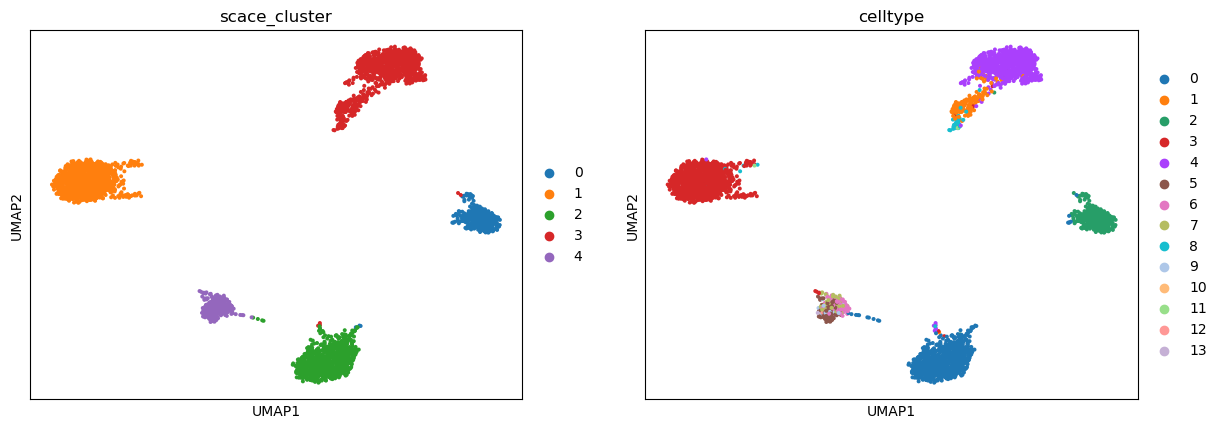

In [42]:
adata.obs['celltype'] = adata.obs['celltype'].astype(int).astype('category')
adata.obs['scace_cluster'] = adata.obs['scace_cluster'].astype(int).astype('category')
sc.pl.umap(adata, color=['scace_cluster', 'celltype'])

### Show initial clustering results

In [43]:
# emb_all[0] is the embedding after pre-training
# pred_all[0] is the initial clustering result after pre-training

adata_tmp = sc.AnnData(emb_all[0])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_cluster'] = pred_all[0]
adata_tmp.obs['scace_cluster'] = adata_tmp.obs['scace_cluster'].astype(int).astype('category')

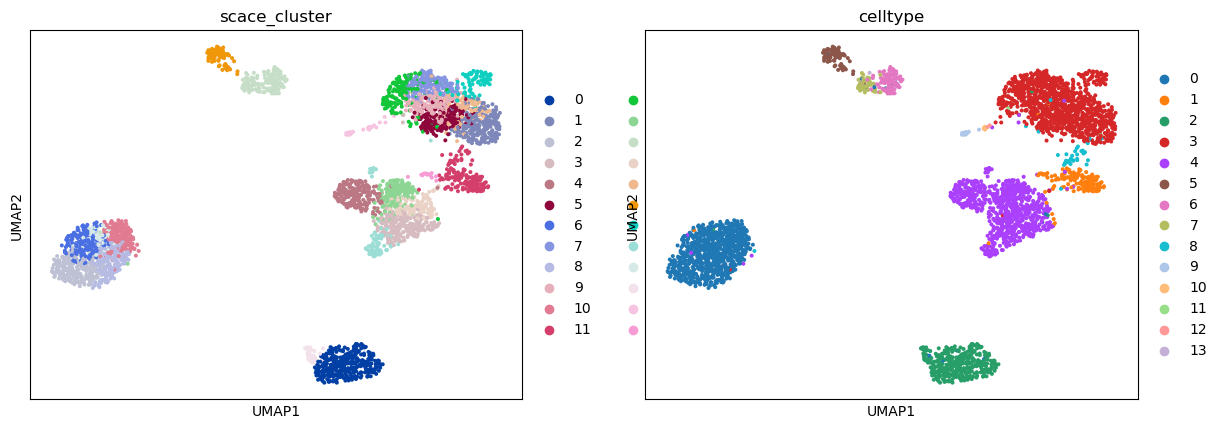

In [44]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_cluster', 'celltype'])

### Show clustering results before and after cluster merging

For the first time

In [12]:
# emb_all[1] is the embedding of the first cluster merging.
# pred_all[1] is the all clustering results from the first cluster merging, where
# pred_all[1][0] is the clustering result before cluster merging, and
# pred_all[1][0] is the clustering result after cluster merging.

adata_tmp = sc.AnnData(emb_all[1])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[1][0], pred_all[1][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

In [20]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])

KeyError: 'Could not find key scace_before in .var_names or .obs.columns.'

<Figure size 2183.4x480 with 0 Axes>

For the final time

In [21]:
adata_tmp = sc.AnnData(emb_all[-2])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[2][0], pred_all[2][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

In [23]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])

NameError: name 'adata_tmp' is not defined